In [1]:
import torch
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import scienceplots as sp
import seaborn as sns

column_width = 3.5

with plt.style.context(['science']):
    sci_cycle = plt.rcParams['axes.prop_cycle']

/home/dannya1/anaconda3/envs/torch2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })
# SHOW = False
SHOW = True

# CIFAR Accuracy vs. Width

In [3]:
df_cifar = pd.read_csv('./results/us_results_cifar.csv')
df_tinyimagenet = pd.read_csv('./results/us_results_tinyimagenet.csv')

In [4]:
df_cifar

,Model Name,1.0,0.975,0.95,0.925,0.9,0.875,0.85,0.825,0.8,...,0.475,0.45,0.425,0.4,0.375,0.35,0.325,0.3,0.275,0.25
0,usresnet20,0.6606,0.6606,0.6606,0.6436,0.6436,0.6436,0.6436,0.6346,0.6237,...,0.5375,0.5375,0.5375,0.4986,0.4986,0.4986,0.4986,0.4986,0.4290,0.4290
1,usresnet32,0.6808,0.6808,0.6808,0.6710,0.6710,0.6710,0.6710,0.6651,0.6523,...,0.5777,0.5777,0.5777,0.5281,0.5281,0.5281,0.5281,0.5281,0.4641,0.4641
2,usresnet44,0.6973,0.6973,0.6973,0.6868,0.6868,0.6868,0.6868,0.6796,0.6657,...,0.5924,0.5924,0.5924,0.5566,0.5566,0.5566,0.5566,0.5566,0.4823,0.4823
3,usresnet56,0.7019,0.7019,0.7019,0.6904,0.6904,0.6904,0.6904,0.6849,0.6759,...,0.6115,0.6115,0.6115,0.5699,0.5699,0.5699,0.5699,0.5699,0.5019,0.5019
4,usvgg11_bn,0.6757,0.6738,0.6739,0.6738,0.6734,0.6729,0.6712,0.6710,0.6709,...,0.6426,0.6354,0.6291,0.6250,0.6184,0.6106,0.6074,0.6001,0.5902,0.5917
5,usvgg13_bn,0.7062,0.7054,0.7043,0.7036,0.7057,0.7047,0.7038,0.7041,0.7024,...,0.6711,0.6616,0.6573,0.6463,0.6436,0.6312,0.6246,0.6203,0.6104,0.6059
6,usvgg16_bn,0.7101,0.7093,0.7097,0.7094,0.7082,0.7080,0.7067,0.7054,0.7048,...,0.6767,0.6715,0.6692,0.6602,0.6577,0.6517,0.6452,0.6405,0.6326,0.6287
7,usvgg19_bn,0.7068,0.7066,0.7049,0.7035,0.7035,0.7039,0.7031,0.7045,0.7033,...,0.6671,0.6628,0.6587,0.6529,0.6437,0.6340,0.6245,0.6234,0.6141,0.6115
8,usvit,0.4760,0.4715,0.4705,0.4704,0.4712,0.4674,0.4684,0.4664,0.4652,...,0.4636,0.4641,0.4615,0.4614,0.4613,0.4614,0.4606,0.4533,0.4505,0.4549


In [5]:
df_tinyimagenet

,Model Name,1.0,0.975,0.95,0.925,0.9,0.875,0.85,0.825,0.8,...,0.475,0.45,0.425,0.4,0.375,0.35,0.325,0.3,0.275,0.25
0,usvit,0.3572,0.3561,0.3537,0.3542,0.3524,0.3525,0.3525,0.3519,0.3510,...,0.3402,0.3408,0.3388,0.3385,0.3380,0.3350,0.3334,0.3247,0.3287,0.3317
1,usresnet56,0.5490,0.5490,0.5490,0.5359,0.5359,0.5359,0.5359,0.5217,0.5058,...,0.3998,0.3998,0.3998,0.3564,0.3564,0.3564,0.3564,0.3564,0.2782,0.2782
2,usvgg16_bn,0.5705,0.5720,0.5717,0.5699,0.5708,0.5683,0.5696,0.5683,0.5687,...,0.5494,0.5381,0.5362,0.5267,0.5164,0.5090,0.5000,0.4899,0.4773,0.4763


In [6]:
df_cifar = df_cifar.melt(id_vars=['Model Name'], var_name='sparsity', value_name='value')
df_cifar['sparsity'] = df_cifar['sparsity'].astype('float64') * 100
df_cifar['value'] = df_cifar['value'] * 100
df_cifar['Model Name'] = df_cifar['Model Name'].astype('string')

In [7]:
df_tinyimagenet = df_tinyimagenet.melt(id_vars=['Model Name'], var_name='sparsity', value_name='value')
df_tinyimagenet['sparsity'] = df_tinyimagenet['sparsity'].astype('float64') * 100
df_tinyimagenet['value'] = df_tinyimagenet['value'] * 100
df_tinyimagenet['Model Name'] = df_tinyimagenet['Model Name'].astype('string')

In [8]:
df_cifar = df_cifar.sort_values(by=['Model Name', 'sparsity'])
df_tinyimagenet = df_tinyimagenet.sort_values(by=['Model Name', 'sparsity'])

In [9]:
pattern_vgg = r'vgg'
pattern_resnet = r'resnet'
pattern_vit = r'vit'

# Filter rows where "Model Name" matches the regex pattern
df_cifar_vgg = df_cifar[df_cifar['Model Name'].str.contains(pattern_vgg, regex=True, case=False)]
df_cifar_resnet = df_cifar[df_cifar['Model Name'].str.contains(pattern_resnet, regex=True, case=False)]
df_cifar_vit = df_cifar[df_cifar['Model Name'].str.contains(pattern_vit, regex=True, case=False)]

df_tinyimagenet_vgg = df_tinyimagenet[df_tinyimagenet['Model Name'].str.contains(pattern_vgg, regex=True, case=False)]
df_tinyimagenet_resnet = df_tinyimagenet[df_tinyimagenet['Model Name'].str.contains(pattern_resnet, regex=True, case=False)]
df_tinyimagenet_vit = df_tinyimagenet[df_tinyimagenet['Model Name'].str.contains(pattern_vit, regex=True, case=False)]

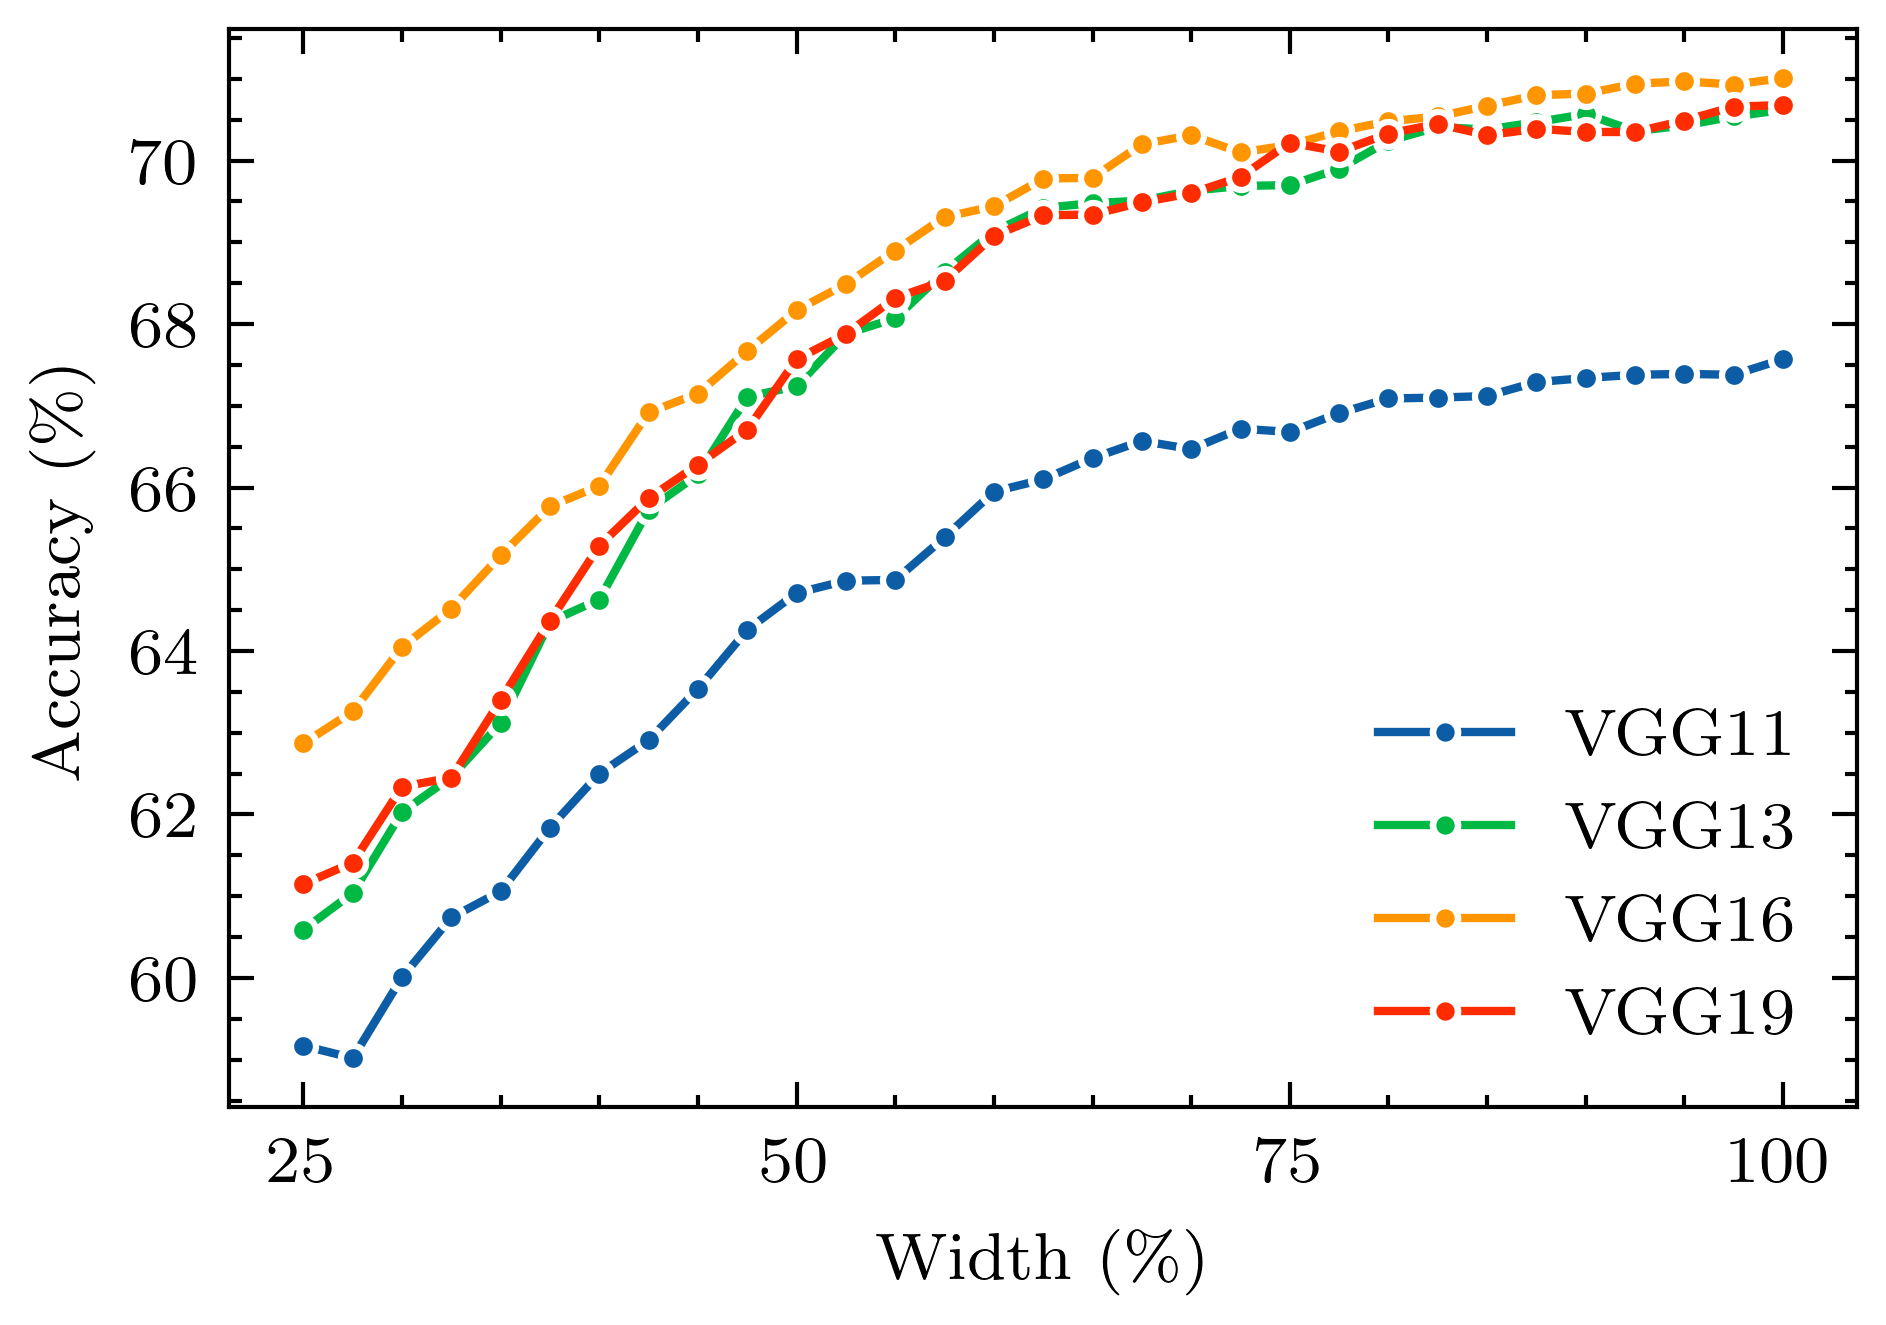

In [10]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# Plotting
with plt.style.context(['science', 'ieee']):
    plt.rcParams['axes.prop_cycle'] = sci_cycle
    plt.figure(figsize=(column_width, column_width/1.5))
    ax = sns.lineplot(data=df_cifar_vgg, x='sparsity', y='value', hue='Model Name', marker='o', markersize=3)
    
    ax.set_xlabel('Width (\%)')
    ax.set_ylabel('Accuracy (\%)')
    
    plt.xticks([25, 50, 75, 100])  
    
    model_names = ['VGG11', 'VGG13', 'VGG16', 'VGG19']
    legend_handles = [Line2D([0], [0], color=sci_cycle.by_key()['color'][i], marker='o', markersize=3, mec='#ffffff', mew=0.8, label=model_names[i]) for i in range(4)]
    
    ax.legend(handles=legend_handles, loc='lower right')
    
    if SHOW:
        plt.show()
    else:
        plt.savefig('./results/plots/usvgg_accuracy.pgf', bbox_inches='tight')
        plt.close()
    

In [15]:
df_tinyimagenet_vit

,Model Name,sparsity,value
90,usvit,25.0,33.170000
87,usvit,27.5,32.870001
84,usvit,30.0,32.470000
81,usvit,32.5,33.340001
78,usvit,35.0,33.500001
75,usvit,37.5,33.800000
72,usvit,40.0,33.849999
69,usvit,42.5,33.880001
66,usvit,45.0,34.079999
63,usvit,47.5,34.020001


In [64]:
df_cifar_resnet = df_cifar_resnet.drop_duplicates(subset=['value'], keep='last')
df_tinyimagenet_resnet = df_tinyimagenet_resnet.drop_duplicates(subset=['value'], keep='last')

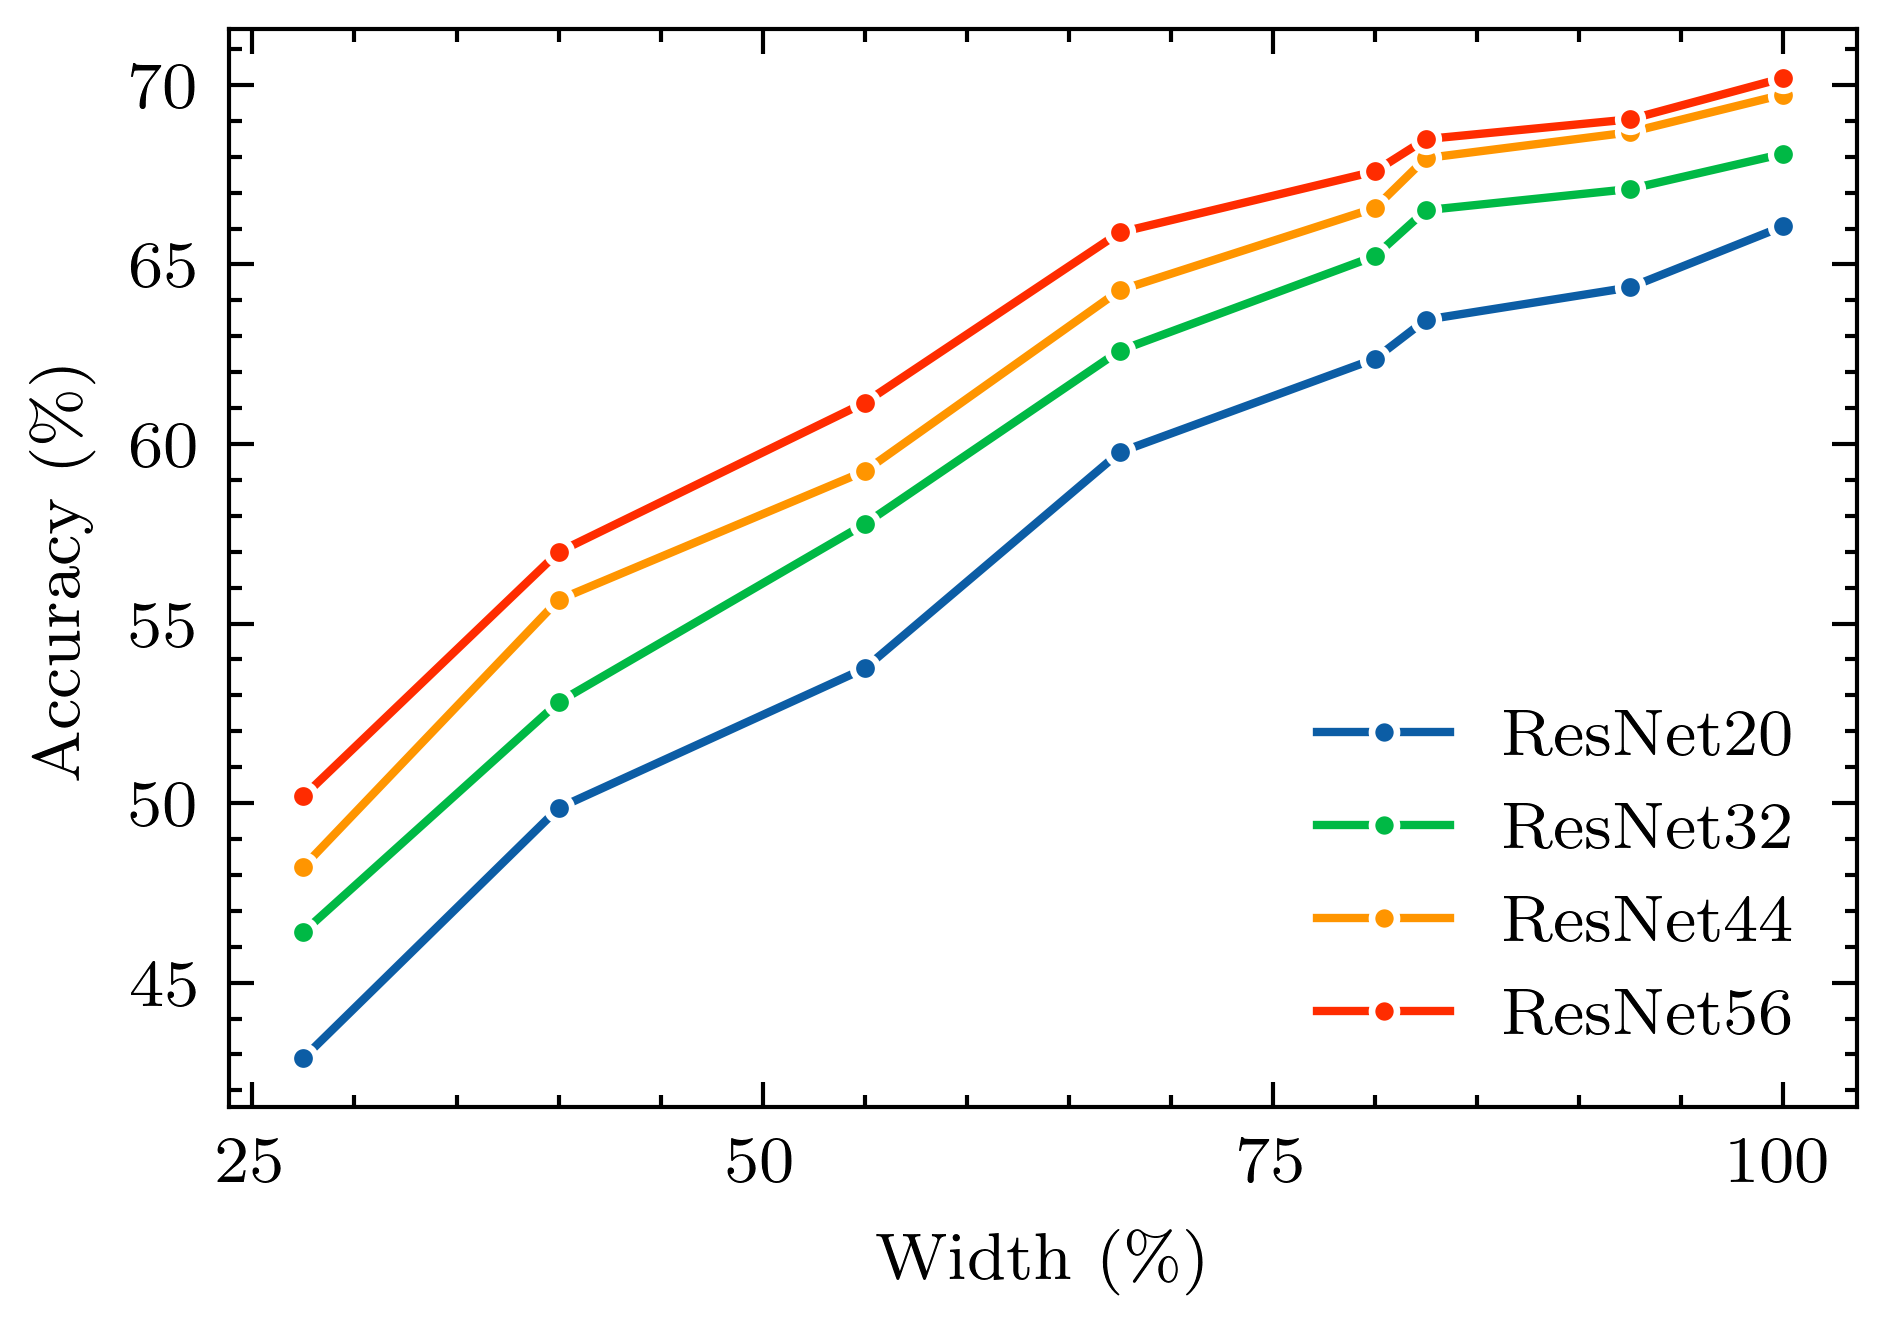

In [65]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# Plotting
with plt.style.context(['science', 'ieee']):
    plt.rcParams['axes.prop_cycle'] = sci_cycle
    plt.figure(figsize=(column_width, column_width/1.5))
    ax = sns.lineplot(data=df_cifar_resnet, x='sparsity', y='value', hue='Model Name', marker='o', markersize=3)
    
    ax.set_xlabel('Width (\%)')
    ax.set_ylabel('Accuracy (\%)')
    
    plt.xticks([25, 50, 75, 100])  
    
    model_names = ['ResNet20', 'ResNet32', 'ResNet44', 'ResNet56']
    legend_handles = [Line2D([0], [0], color=sci_cycle.by_key()['color'][i], marker='o', markersize=3, mec='#ffffff', mew=0.8, label=model_names[i]) for i in range(4)]
    
    ax.legend(handles=legend_handles, loc='lower right')
    
    if SHOW:
        plt.show()
    else:
        plt.savefig('./results/plots/usresnet_accuracy.pgf', bbox_inches='tight')
        plt.close()
    

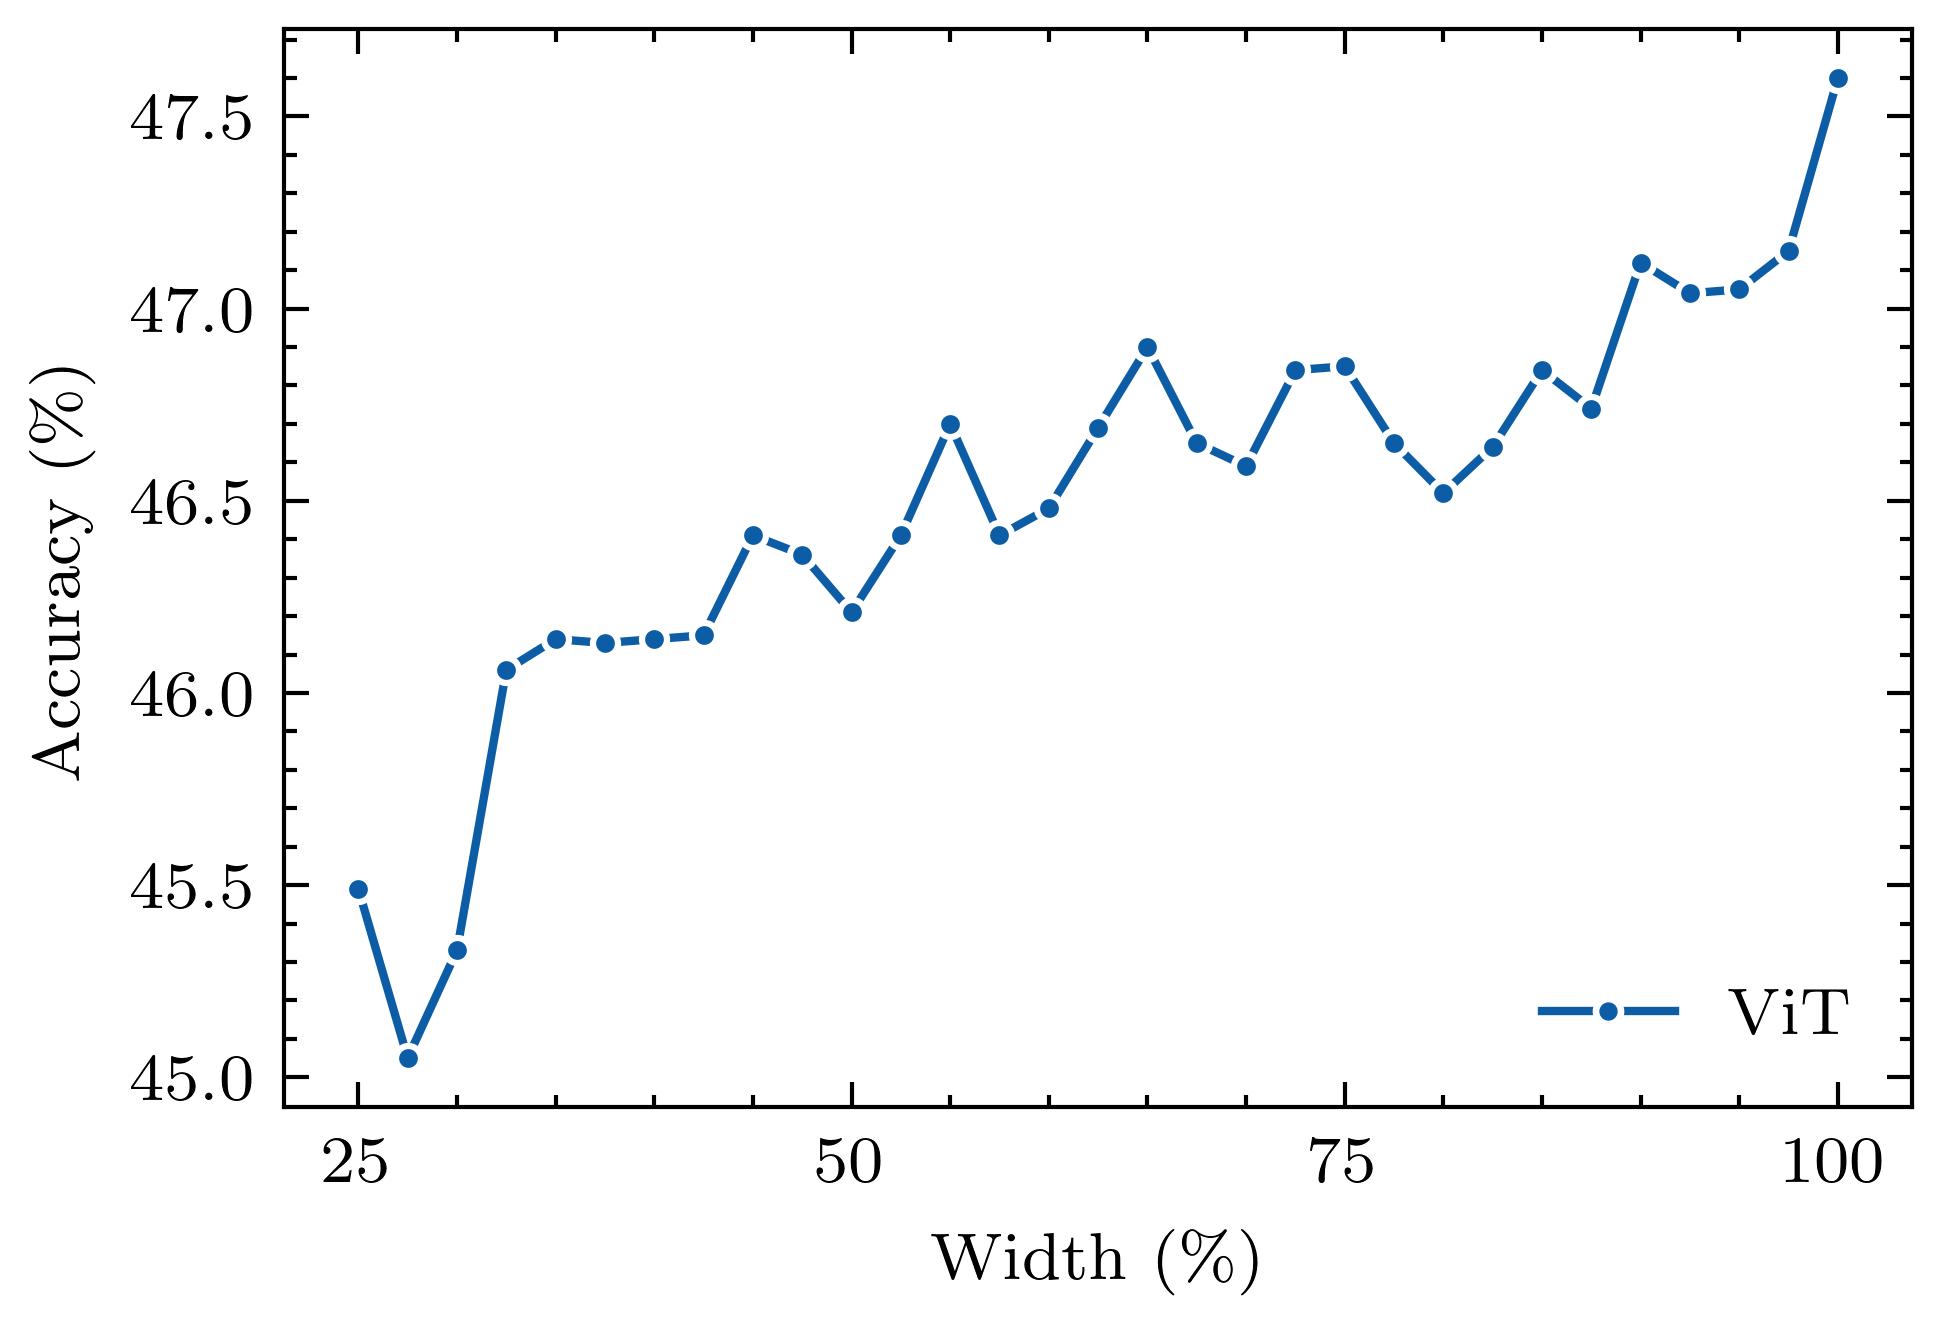

In [66]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# Plotting
with plt.style.context(['science', 'ieee']):
    plt.rcParams['axes.prop_cycle'] = sci_cycle
    plt.figure(figsize=(column_width, column_width/1.5))
    ax = sns.lineplot(data=df_cifar_vit, x='sparsity', y='value', hue='Model Name', marker='o', markersize=3)
    
    ax.set_xlabel('Width (\%)')
    ax.set_ylabel('Accuracy (\%)')
    
    plt.xticks([25, 50, 75, 100])  
    
    model_names = ['ViT']
    legend_handles = [Line2D([0], [0], color=sci_cycle.by_key()['color'][i], marker='o', markersize=3, mec='#ffffff', mew=0.8, label=model_names[i]) for i in range(1)]
    
    ax.legend(handles=legend_handles, loc='lower right')
    
    if SHOW:
        plt.show()
    else:
        plt.savefig('./results/plots/usvit_accuracy.pgf', bbox_inches='tight')
        plt.close()
    

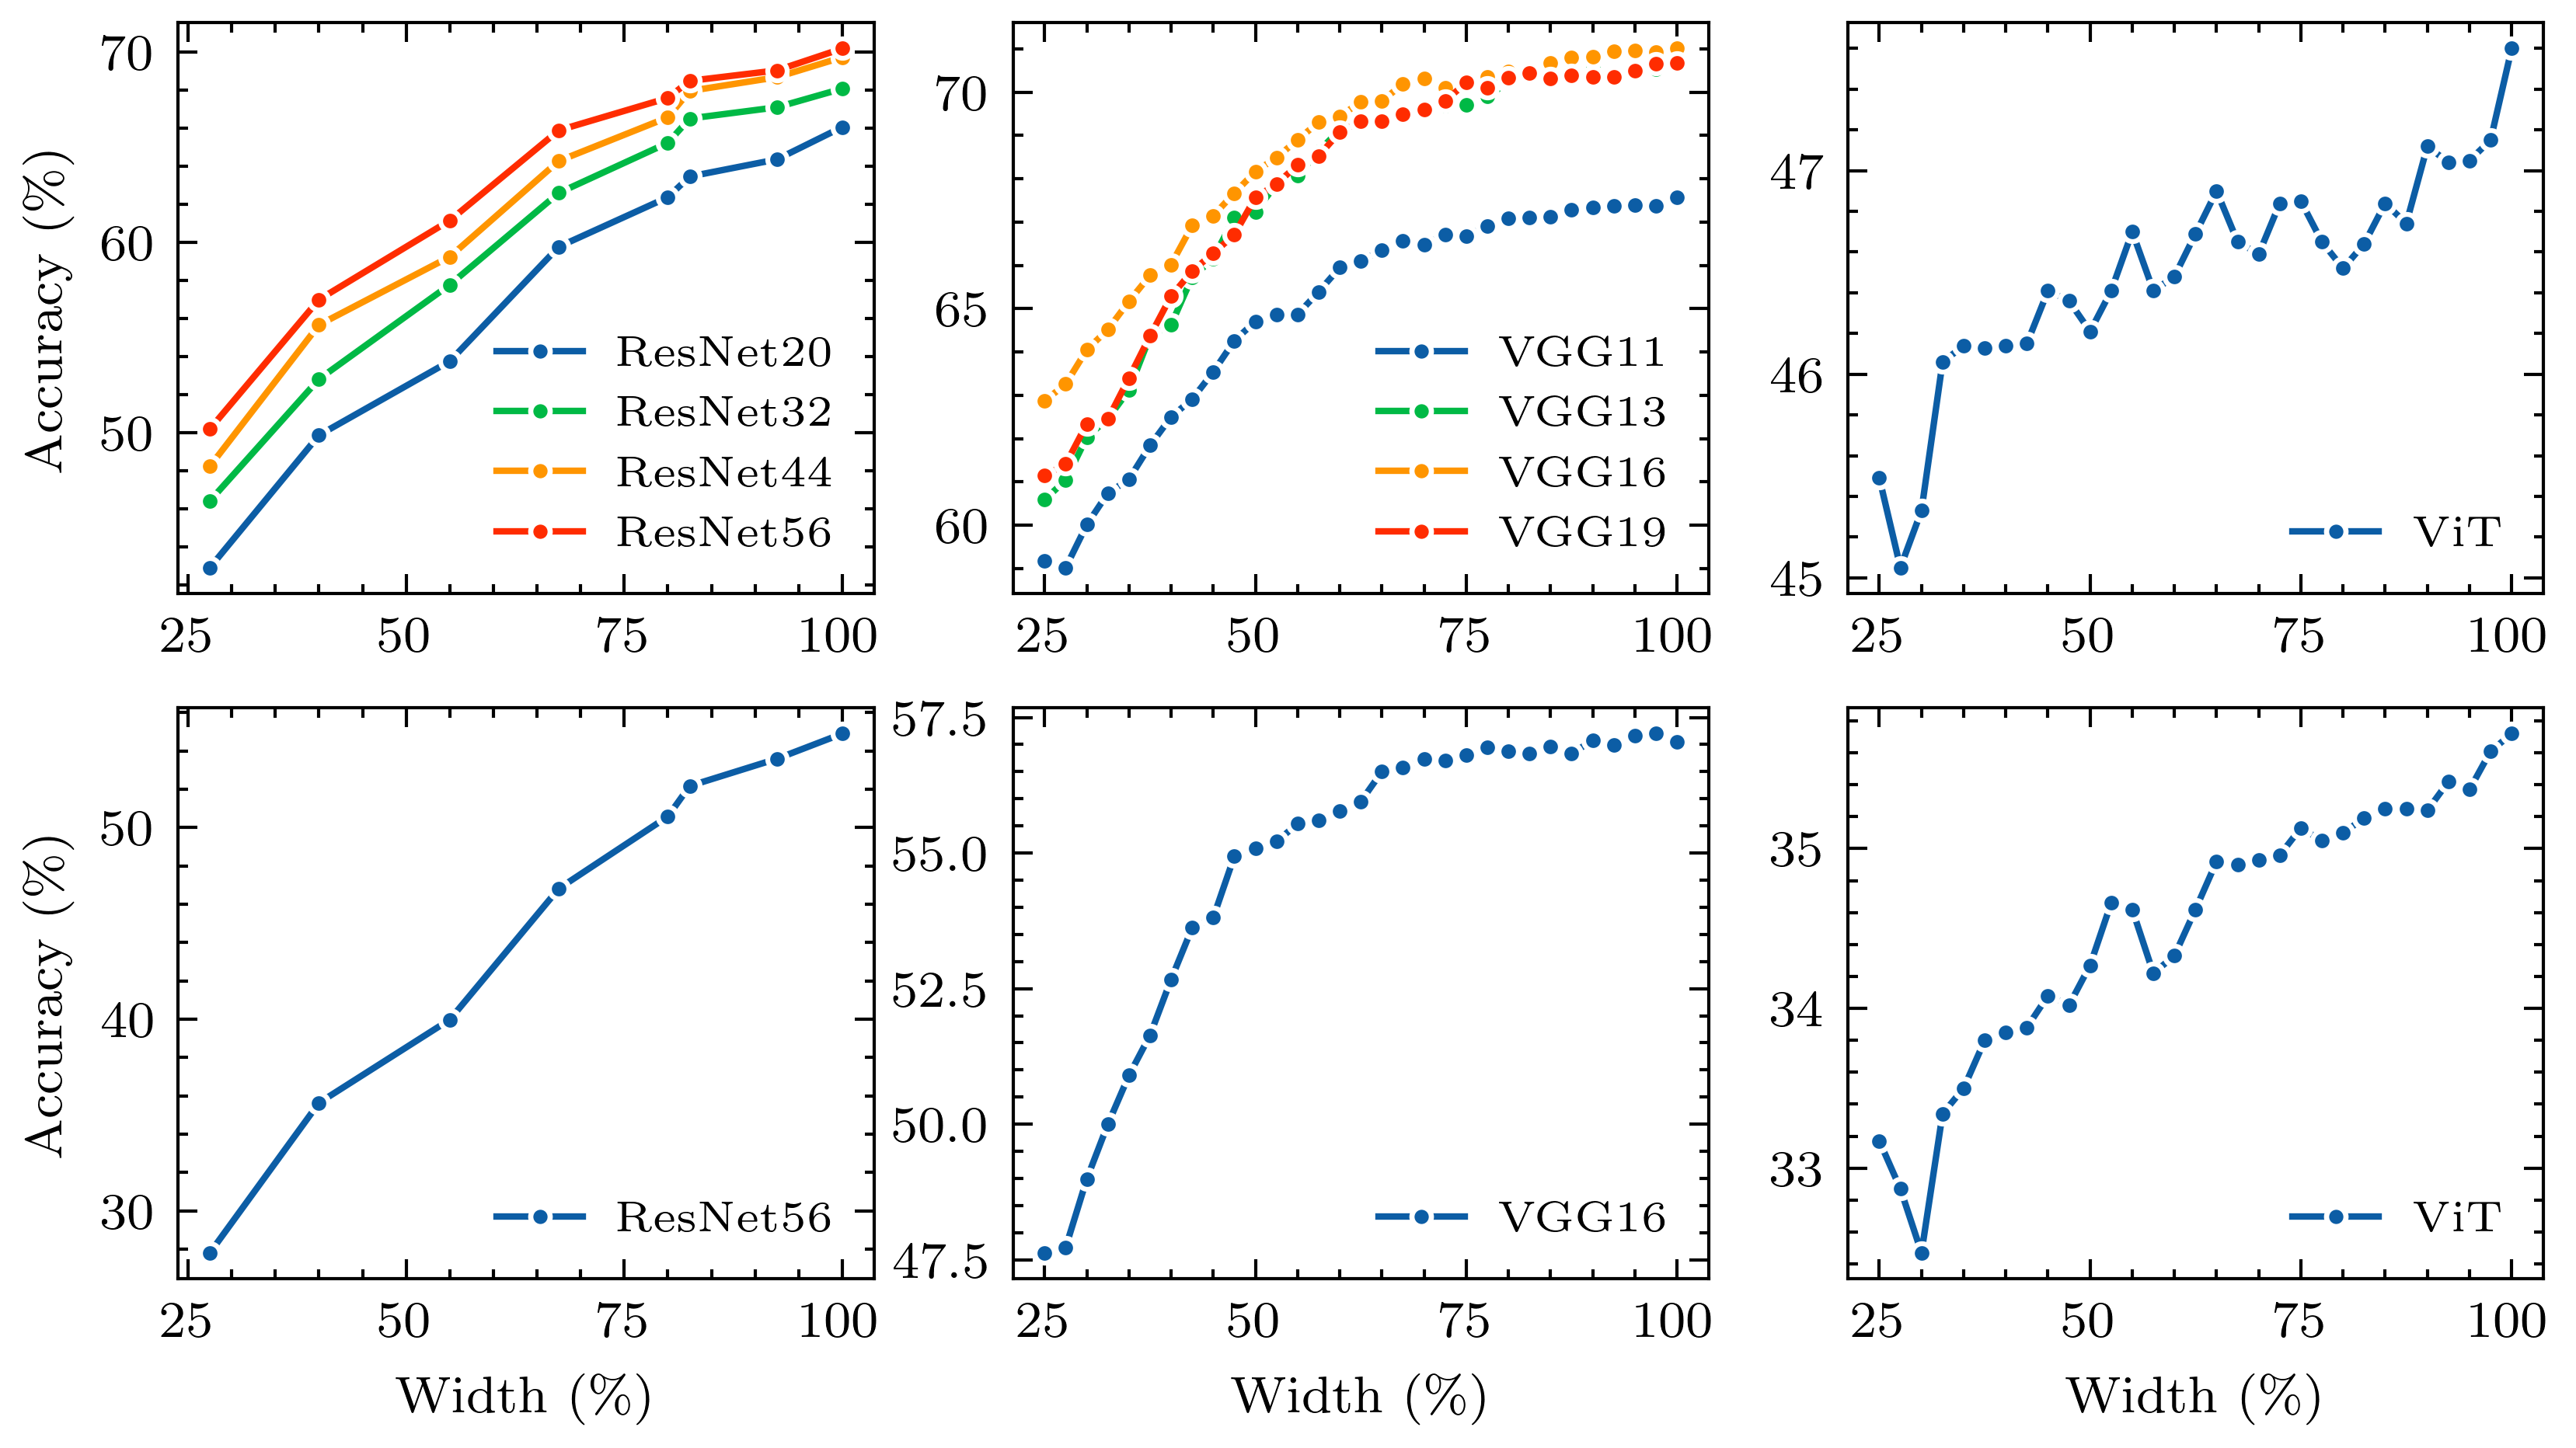

In [67]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# Plotting
with plt.style.context(['science', 'ieee']):
    plt.rcParams['axes.prop_cycle'] = sci_cycle
    
    # Create figure and axes
    # fig, (ax1, ax2, ax3) = plt.subplots(figsize=(column_width * 1.87, column_width/2), ncols=3)
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(column_width * 1.87, column_width))
    ax1, ax2, ax3, ax4, ax5, ax6 = axes.flatten()
    
    # ResNet CIFAR plot
    sns.lineplot(data=df_cifar_resnet, x='sparsity', y='value', hue='Model Name', marker='o', markersize=3, ax=ax1)
    ax1.set_xlabel('')
    ax1.set_ylabel('Accuracy (\%)')
    plt.sca(ax1)
    plt.xticks([25, 50, 75, 100])
    
    # VGG CIFAR plot
    sns.lineplot(data=df_cifar_vgg, x='sparsity', y='value', hue='Model Name', marker='o', markersize=3, ax=ax2)
    ax2.set_xlabel('')
    ax2.set_ylabel('')
    plt.sca(ax2)
    plt.xticks([25, 50, 75, 100])  
    
    # ViT CIFAR plot
    sns.lineplot(data=df_cifar_vit, x='sparsity', y='value', hue='Model Name', marker='o', markersize=3, ax=ax3)
    ax3.set_xlabel('')
    ax3.set_ylabel('')
    plt.sca(ax3)
    plt.xticks([25, 50, 75, 100])  
    
    # ResNet Tiny ImageNet plot
    sns.lineplot(data=df_tinyimagenet_resnet, x='sparsity', y='value', hue='Model Name', marker='o', markersize=3, ax=ax4)
    ax4.set_xlabel('Width (\%)')
    ax4.set_ylabel('Accuracy (\%)')
    plt.sca(ax4)
    plt.xticks([25, 50, 75, 100])
    
    # VGG Tiny ImageNet plot
    sns.lineplot(data=df_tinyimagenet_vgg, x='sparsity', y='value', hue='Model Name', marker='o', markersize=3, ax=ax5)
    ax5.set_xlabel('Width (\%)')
    ax5.set_ylabel('')
    plt.sca(ax5)
    plt.xticks([25, 50, 75, 100])  
    
    # ViT Tiny ImageNet plot
    sns.lineplot(data=df_tinyimagenet_vit, x='sparsity', y='value', hue='Model Name', marker='o', markersize=3, ax=ax6)
    ax6.set_xlabel('Width (\%)')
    ax6.set_ylabel('')
    plt.sca(ax6)
    plt.xticks([25, 50, 75, 100])  
    
    # ResNet CIFAR legend
    model_names = ['ResNet20', 'ResNet32', 'ResNet44', 'ResNet56']
    legend_handles = [Line2D([0], [0], color=sci_cycle.by_key()['color'][i], marker='o', markersize=3, mec='#ffffff', mew=0.8, label=model_names[i]) for i in range(4)]
    ax1.legend(handles=legend_handles, loc='lower right', fontsize='small')
    
    # VGG CIFAR legend
    model_names = ['VGG11', 'VGG13', 'VGG16', 'VGG19']
    legend_handles = [Line2D([0], [0], color=sci_cycle.by_key()['color'][i], marker='o', markersize=3, mec='#ffffff', mew=0.8, label=model_names[i]) for i in range(4)]
    ax2.legend(handles=legend_handles, loc='lower right', fontsize='small')
    
    # ViT CIFAR legend
    model_names = ['ViT']
    legend_handles = [Line2D([0], [0], color=sci_cycle.by_key()['color'][i], marker='o', markersize=3, mec='#ffffff', mew=0.8, label=model_names[i]) for i in range(1)]
    ax3.legend(handles=legend_handles, loc='lower right', fontsize='small')
    
    # ResNet Tiny ImageNet legend
    model_names = ['ResNet56']
    legend_handles = [Line2D([0], [0], color=sci_cycle.by_key()['color'][i], marker='o', markersize=3, mec='#ffffff', mew=0.8, label=model_names[i]) for i in range(1)]
    ax4.legend(handles=legend_handles, loc='lower right', fontsize='small')
    
    # VGG Tiny ImageNet legend
    model_names = ['VGG16']
    legend_handles = [Line2D([0], [0], color=sci_cycle.by_key()['color'][i], marker='o', markersize=3, mec='#ffffff', mew=0.8, label=model_names[i]) for i in range(1)]
    ax5.legend(handles=legend_handles, loc='lower right', fontsize='small')
    
    # ViT Tiny ImageNet legend
    model_names = ['ViT']
    legend_handles = [Line2D([0], [0], color=sci_cycle.by_key()['color'][i], marker='o', markersize=3, mec='#ffffff', mew=0.8, label=model_names[i]) for i in range(1)]
    ax6.legend(handles=legend_handles, loc='lower right', fontsize='small')
    
    if SHOW:
        plt.show()
    else:
        plt.savefig('./results/plots/uscifar_accuracy.pgf', bbox_inches='tight')
        plt.close()
    

# CIFAR Latency vs Accuracy Plots

In [13]:
df_cifar_latency = pd.read_csv('./results/us_latency_results_cifar_b1_cpu.csv')

In [14]:
df_cifar_latency = pd.read_csv('./results/us_latency_results_cifar_b1_cpu.csv')
df_cifar_latency = df_cifar_latency.melt(id_vars=['Model Name'], var_name='sparsity', value_name='latency')
df_cifar_latency['sparsity'] = df_cifar_latency['sparsity'].astype('float64') * 100
df_cifar_latency['Model Name'] = df_cifar_latency['Model Name'].astype('string')
df_cifar_latency = df_cifar_latency.sort_values(by=['Model Name', 'sparsity'])

In [15]:
df_accuracy_resnet56 = df_cifar_resnet[df_cifar_resnet['Model Name'] == 'usresnet56']
df_accuracy_vgg16 = df_cifar_vgg[df_cifar_vgg['Model Name'] == 'usvgg16_bn']

In [16]:
df_latency_resnet56 = df_cifar_latency[df_cifar_latency['Model Name'] == 'usresnet56']
df_latency_vgg16 = df_cifar_latency[df_cifar_latency['Model Name'] == 'usvgg16_bn']

In [17]:
resnet56_sparsities = df_accuracy_resnet56['sparsity'].tolist()

df_latency_resnet56 = df_latency_resnet56[df_latency_resnet56['sparsity'].isin(resnet56_sparsities)]

df_resnet56 = pd.merge(df_accuracy_resnet56, df_latency_resnet56, on='sparsity')
df_vgg16 = pd.merge(df_accuracy_vgg16, df_latency_vgg16, on='sparsity')
df_vgg16 = df_vgg16[df_vgg16['sparsity'] != 100.0]

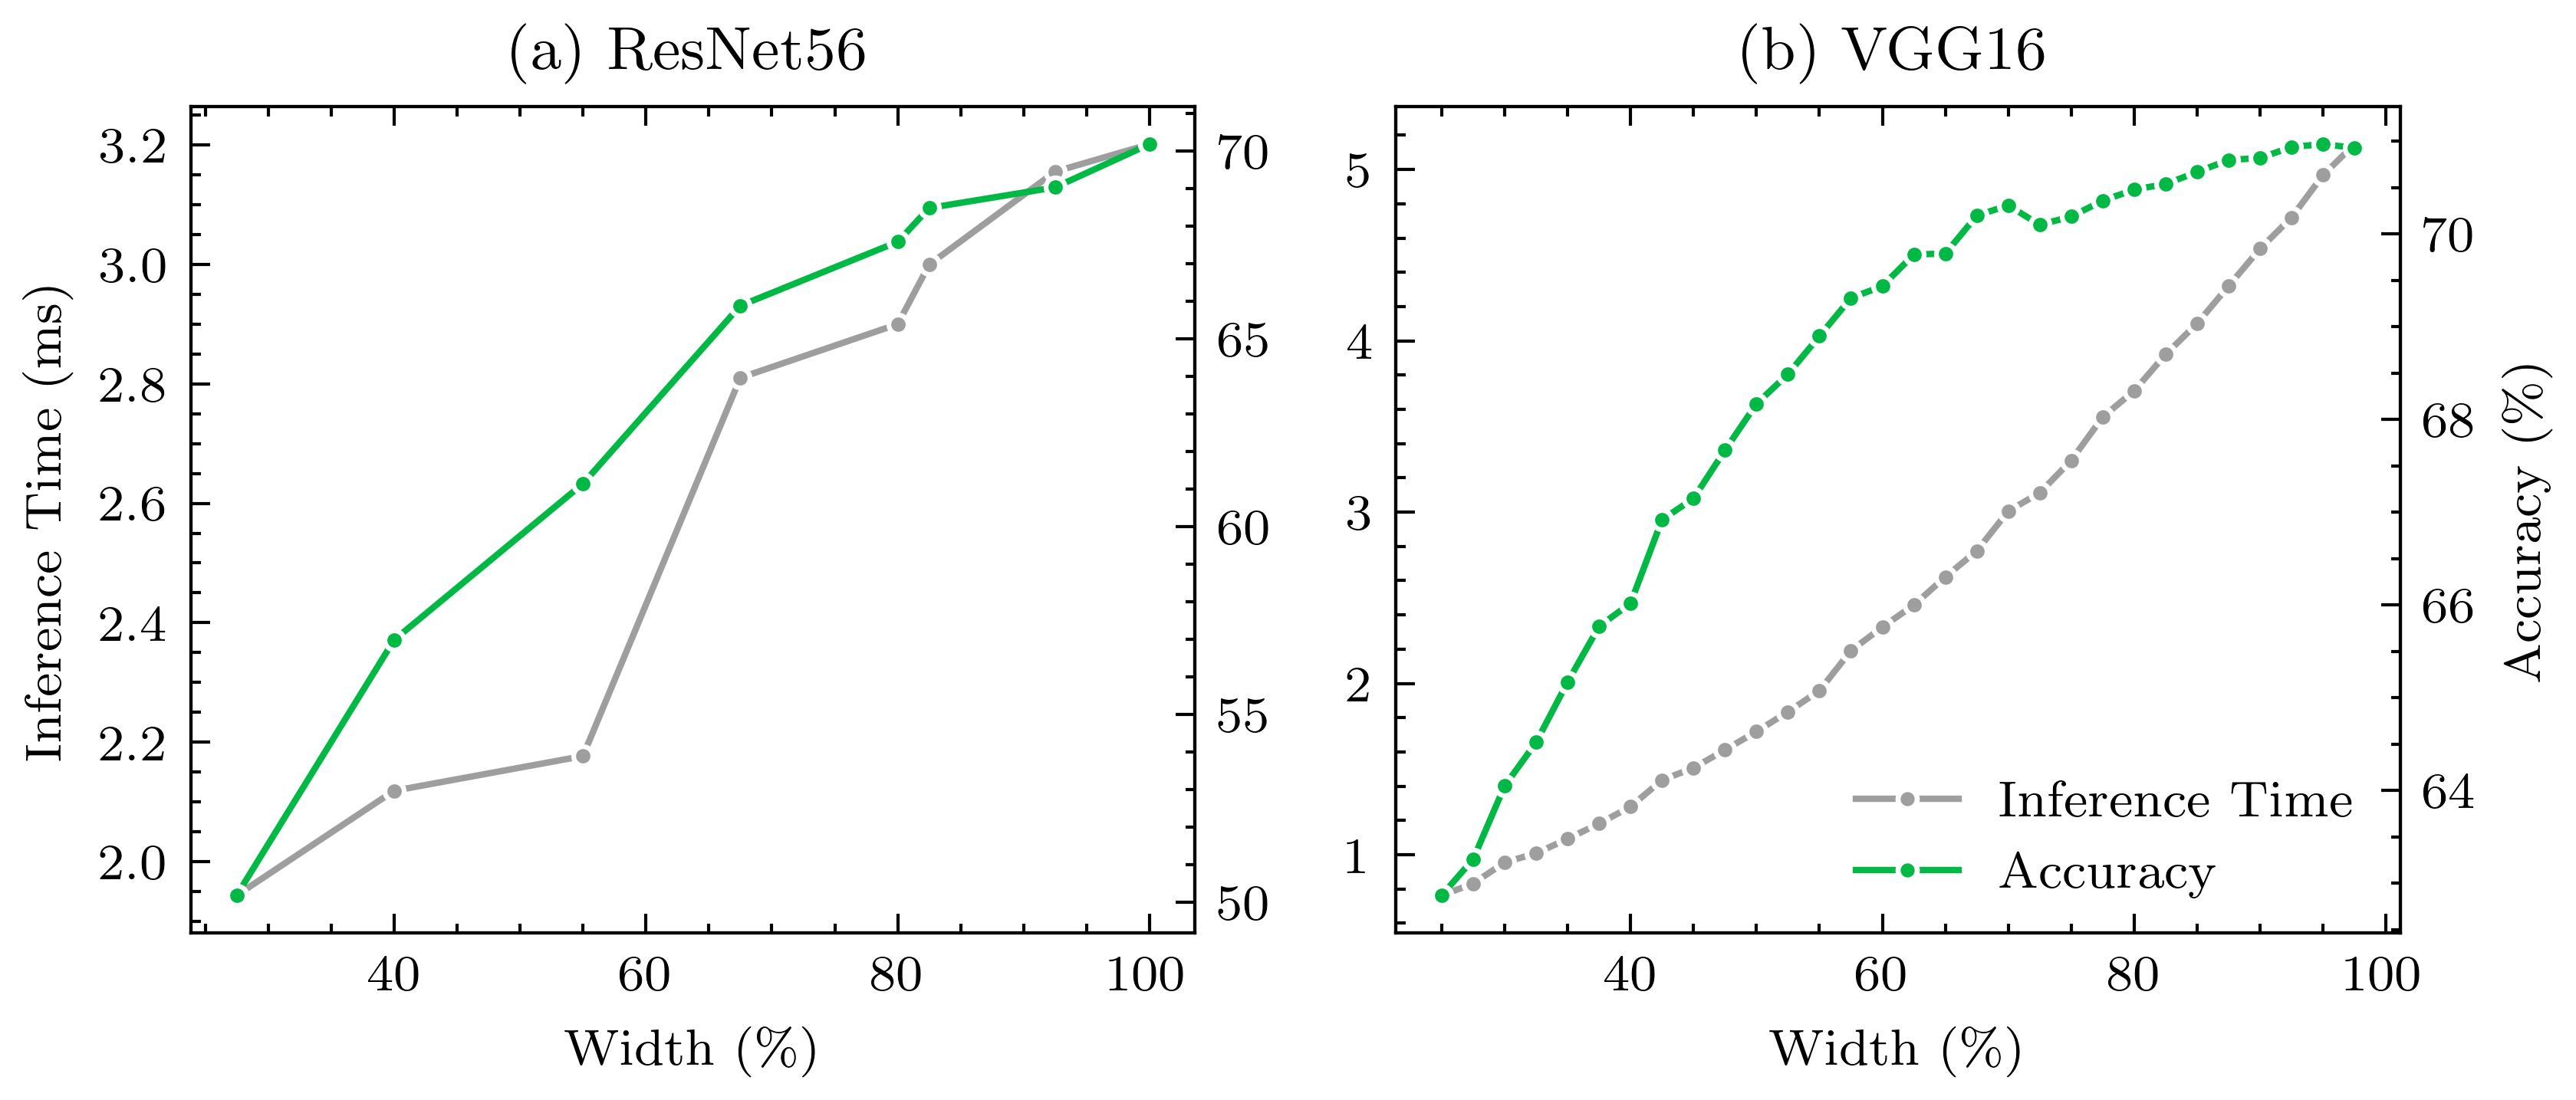

In [18]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

with plt.style.context(['science', 'ieee']):
    plt.rcParams['axes.prop_cycle'] = sci_cycle
    
    # Create figure and axes
    fig, (ax1, ax2) = plt.subplots(figsize=(column_width * 1.77, column_width/1.5), ncols=2)
    
    # ResNet56
    inference_time_cpu_resnet56 = sns.lineplot(data=df_resnet56, x='sparsity', y='latency', marker='o', c=sci_cycle.by_key()['color'][6], ax=ax1, linewidth=1, markersize=3)
    # ax1.set_ylim(50, 300)
    
    ax1.set_ylabel('Inference Time (ms)')
    ax1.set_xlabel('Width (\%)')
    
    ax1_flip = ax1.twinx()
    
    accuracy_resnet56 = sns.lineplot(data=df_resnet56, x='sparsity', y='value', marker='o', c=sci_cycle.by_key()['color'][1], ax=ax1_flip, linewidth=1, markersize=3)
    # ax1_flip.set_ylim(0, 40)
    
    ax1_flip.set_ylabel('')
    
    # VGG16
    inference_time_cpu_vgg16 = sns.lineplot(data=df_vgg16, x='sparsity', y='latency', marker='o', c=sci_cycle.by_key()['color'][6], ax=ax2, linewidth=1, markersize=3)
    # ax2.set_ylim(50, 300)
    
    ax2.set_ylabel('')
    ax2.set_xlabel('Width (\%)')
    
    ax2_flip = ax2.twinx()
    
    accuracy_vgg16 = sns.lineplot(data=df_vgg16, x='sparsity', y='value', marker='o', c=sci_cycle.by_key()['color'][1], ax=ax2_flip, linewidth=1, markersize=3)
    # ax2_flip.set_ylim(0, 40)
    
    ax2_flip.set_ylabel('Accuracy (\%)')
    
    legend_handles = [Line2D([0], [0], color=sci_cycle.by_key()['color'][6], marker='o', markersize=3, mec='#ffffff', mew=0.8, label='Inference Time'),
                      Line2D([0], [0], color=sci_cycle.by_key()['color'][1], marker='o', markersize=3, mec='#ffffff', mew=0.8, label='Accuracy'),
    ]
    
    fig.legend(handles=legend_handles, loc='lower right', bbox_to_anchor=(0.9, 0.1))
    
    # Title
    ax1.set_title('(a) ResNet56')
    ax2.set_title('(b) VGG16')
    
    if SHOW:
        plt.show()
    else:
        plt.savefig('./results/plots/uscifar_latency.pgf', bbox_inches='tight')
        plt.close()


# YOLOv5-nano mAP/latency vs Width

In [19]:
df_yolov5n_cpu = pd.read_csv('./results/us_results_us_yolov5n_cpu.csv')
df_yolov5n_cuda = pd.read_csv('./results/us_results_us_yolov5n_cuda:0.csv')

In [20]:
df_cpu_inference_time = df_yolov5n_cpu[df_yolov5n_cpu['Metric'] == 'inference_time']
df_cpu_inference_time['Metric'] = ['inference_time_cpu']

/tmp/ipykernel_4046632/991855685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cpu_inference_time['Metric'] = ['inference_time_cpu']


In [21]:
df_yolov5n = pd.concat([df_yolov5n_cuda, df_cpu_inference_time])

In [ ]:
df_yolov5n

,Metric,1.0,0.975,0.95,0.925,0.9,0.875,0.85,0.825,0.8,...,0.475,0.45,0.425,0.4,0.375,0.35,0.325,0.3,0.275,0.25
0,precision,0.512008,0.512969,0.491190,0.497773,0.487991,0.485927,0.486609,0.474990,0.468882,...,0.415425,0.403056,0.403056,0.369681,0.364247,0.368136,0.364218,0.364218,0.355537,0.355666
1,recall,0.359001,0.359347,0.352038,0.348149,0.350004,0.351042,0.347796,0.335020,0.325824,...,0.245663,0.235410,0.235410,0.212718,0.208039,0.206455,0.190551,0.190551,0.161906,0.160506
2,mAP@.5,0.366594,0.365422,0.360377,0.351029,0.348576,0.348356,0.346617,0.331519,0.322904,...,0.233374,0.222153,0.222153,0.196365,0.194945,0.192779,0.176111,0.176111,0.145862,0.145585
3,mAP@.5-.95,0.204663,0.204079,0.200164,0.192692,0.191228,0.190992,0.190182,0.180621,0.175017,...,0.117855,0.112241,0.112241,0.096869,0.096192,0.095353,0.086628,0.086628,0.069681,0.069744
4,loss1,0.053561,0.053570,0.053744,0.054367,0.054493,0.054499,0.054500,0.055602,0.056083,...,0.060912,0.061290,0.061290,0.062684,0.062704,0.062715,0.063237,0.063237,0.066002,0.066008
5,loss2,0.055153,0.055177,0.055297,0.055633,0.055645,0.055636,0.055669,0.056040,0.056292,...,0.058405,0.058632,0.058632,0.059306,0.059317,0.059358,0.059585,0.059585,0.060368,0.060371
6,loss3,0.026238,0.026270,0.026564,0.027146,0.027273,0.027305,0.027364,0.028580,0.029150,...,0.035581,0.036621,0.036621,0.039421,0.039536,0.039664,0.041074,0.041074,0.045313,0.045383
7,setup_time,0.053270,0.053852,0.056615,0.060104,0.055520,0.055713,0.053837,0.056213,0.053413,...,0.054621,0.058420,0.053241,0.057650,0.054530,0.054774,0.054560,0.053897,0.055726,0.055234
8,inference_time,0.794183,0.746721,0.746129,0.782538,0.735325,0.799755,0.732597,0.697696,0.679558,...,0.560795,0.538038,0.550483,0.574624,0.503342,0.522353,0.490789,0.481793,0.484817,0.440605
9,nms_time,1.703482,1.632789,1.610115,1.754057,1.620852,1.683311,1.600793,1.665151,1.690931,...,2.023337,2.017910,1.980704,2.115331,2.096066,2.100764,2.086180,2.137845,2.243840,2.002106


In [23]:
df_yolov5n = df_yolov5n.set_index('Metric').T.reset_index()
df_yolov5n = df_yolov5n.rename(columns={'index': 'width'})
df_yolov5n = df_yolov5n.sort_values(by='width')

In [24]:
df_yolov5n['inference_time'] *= 32
df_yolov5n['width'] = df_yolov5n['width'].astype('float64') * 100
df_yolov5n['mAP@.5'] *= 100

In [ ]:
df_yolov5n

Metric,width,precision,recall,mAP@.5,mAP@.5-.95,loss1,loss2,loss3,setup_time,inference_time,nms_time,inference_time_cpu
30,25.0,0.355666,0.160506,14.558536,0.069744,0.066008,0.060371,0.045383,0.055234,14.099370,2.002106,98.466573
29,27.5,0.355537,0.161906,14.586201,0.069681,0.066002,0.060368,0.045313,0.055726,15.514156,2.243840,98.241037
28,30.0,0.364218,0.190551,17.611135,0.086628,0.063237,0.059585,0.041074,0.053897,15.417365,2.137845,117.827435
27,32.5,0.364218,0.190551,17.611135,0.086628,0.063237,0.059585,0.041074,0.054560,15.705237,2.086180,118.139166
26,35.0,0.368136,0.206455,19.277942,0.095353,0.062715,0.059358,0.039664,0.054774,16.715300,2.100764,121.426020
25,37.5,0.364247,0.208039,19.494526,0.096192,0.062704,0.059317,0.039536,0.054530,16.106929,2.096066,120.937523
24,40.0,0.369681,0.212718,19.636540,0.096869,0.062684,0.059306,0.039421,0.057650,18.387964,2.115331,122.433384
23,42.5,0.403056,0.235410,22.215253,0.112241,0.061290,0.058632,0.036621,0.053241,17.615471,1.980704,130.057732
22,45.0,0.403056,0.235410,22.215253,0.112241,0.061290,0.058632,0.036621,0.058420,17.217206,2.017910,129.423411
21,47.5,0.415425,0.245663,23.337359,0.117855,0.060912,0.058405,0.035581,0.054621,17.945438,2.023337,131.918631


<Figure size 2100x1400 with 0 Axes>

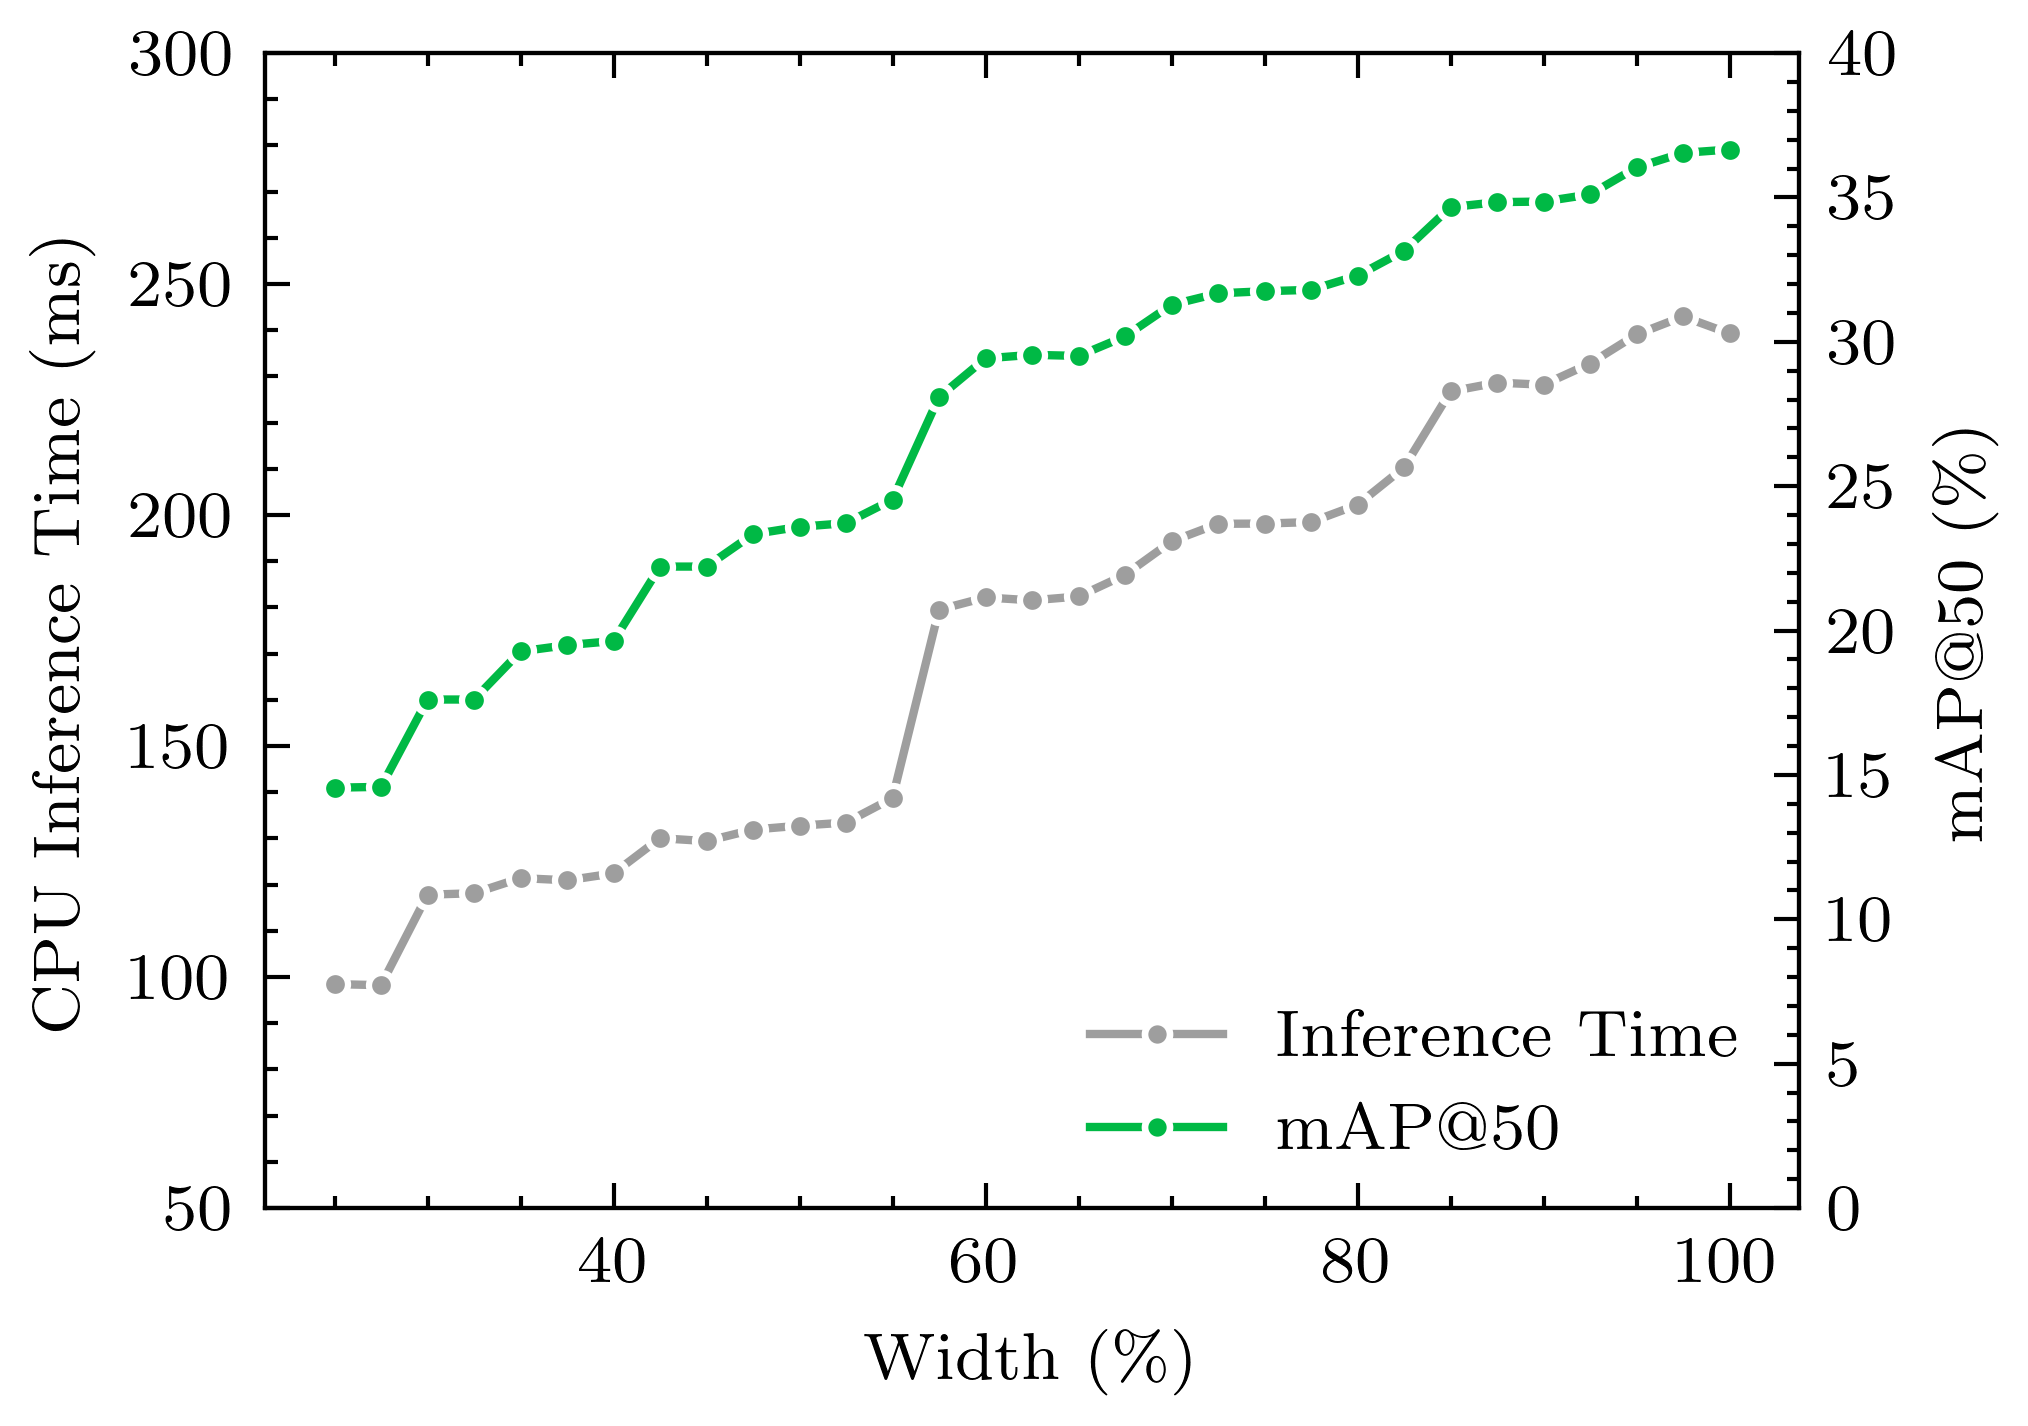

In [26]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

with plt.style.context(['science', 'ieee']):
    plt.rcParams['axes.prop_cycle'] = sci_cycle
    plt.figure(figsize=(column_width, column_width/1.5))
    fig, ax = plt.subplots()
    
    inference_time_cpu = sns.lineplot(data=df_yolov5n, x='width', y='inference_time_cpu', marker='o', c=sci_cycle.by_key()['color'][6], ax=ax, linewidth=1, markersize=3)
    ax.set_ylim(50, 300)
    
    ax.set_ylabel('CPU Inference Time (ms)')
    ax.set_xlabel('Width (\%)')
    
    ax_flip = ax.twinx()
    
    map50 = sns.lineplot(data=df_yolov5n, x='width', y='mAP@.5', marker='o', c=sci_cycle.by_key()['color'][1], ax=ax_flip, linewidth=1, markersize=3)
    ax_flip.set_ylim(0, 40)
    
    ax_flip.set_ylabel('mAP@50 (\%)')
    
    legend_handles = [Line2D([0], [0], color=sci_cycle.by_key()['color'][6], marker='o', markersize=3, mec='#ffffff', mew=0.8, label='Inference Time'),
                      Line2D([0], [0], color=sci_cycle.by_key()['color'][1], marker='o', markersize=3, mec='#ffffff', mew=0.8, label='mAP@50'),
    ]
    
    fig.legend(handles=legend_handles, loc='lower right', bbox_to_anchor=(0.9, 0.1))
    
    if SHOW:
        plt.show()
    else:
        plt.savefig('./results/plots/usyolov5n.pgf', bbox_inches='tight')
        plt.close()

<Figure size 2100x1400 with 0 Axes>

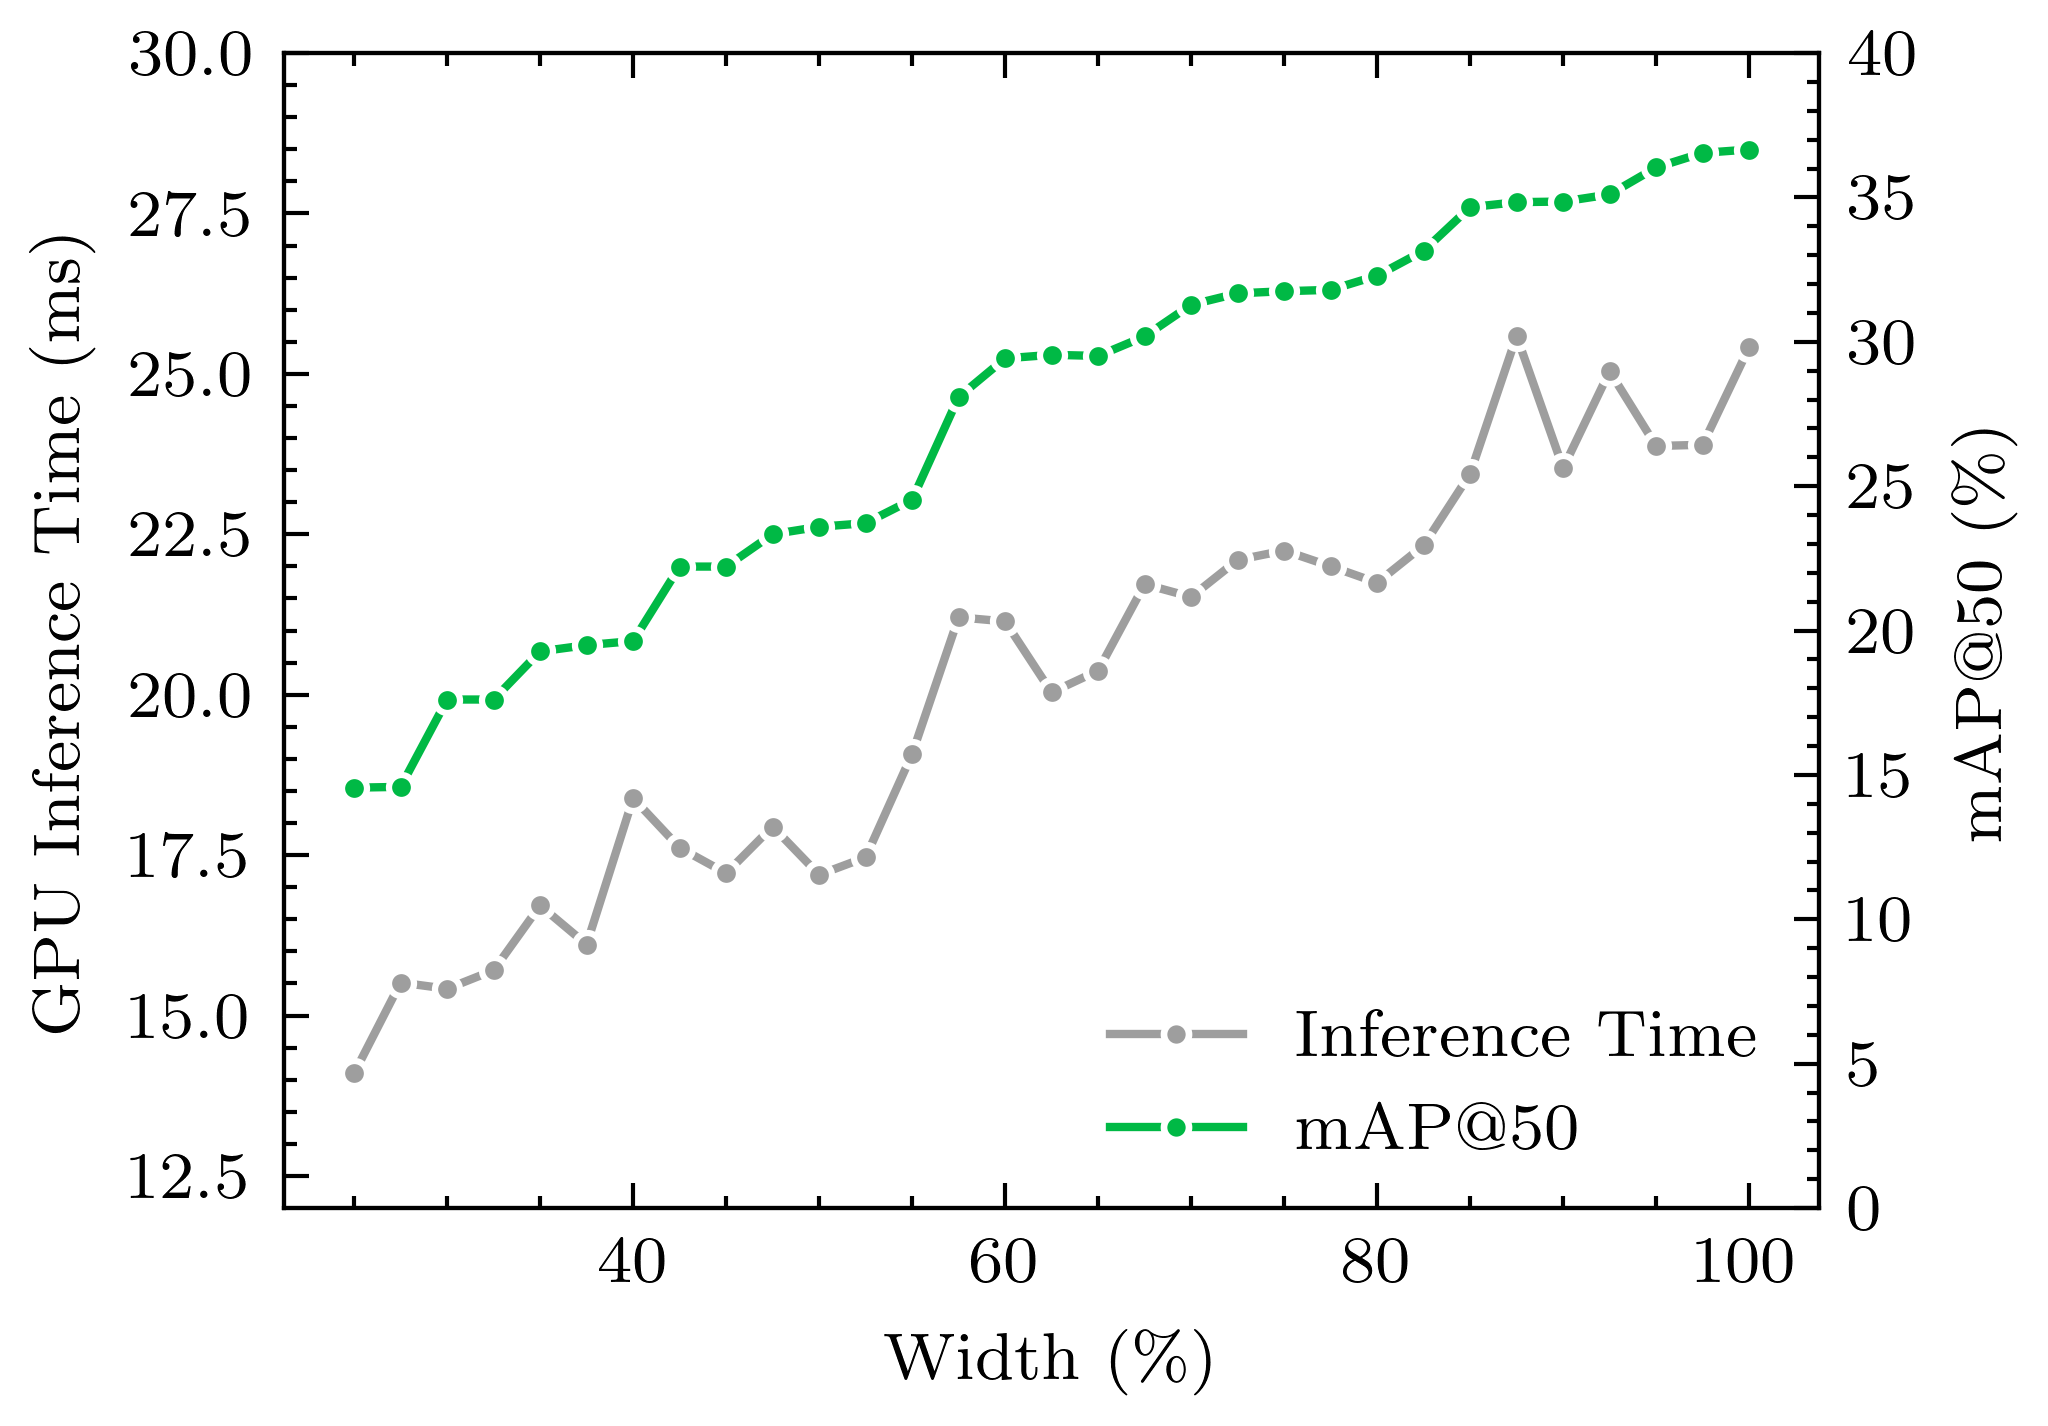

In [27]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

with plt.style.context(['science', 'ieee']):
    plt.rcParams['axes.prop_cycle'] = sci_cycle
    plt.figure(figsize=(column_width, column_width/1.5))
    fig, ax = plt.subplots()
    
    inference_time_cuda = sns.lineplot(data=df_yolov5n, x='width', y='inference_time', marker='o', c=sci_cycle.by_key()['color'][6], ax=ax, linewidth=1, markersize=3)
    ax.set_ylim(12, 30)
    
    ax.set_ylabel('GPU Inference Time (ms)')
    ax.set_xlabel('Width (\%)')
    
    ax_flip = ax.twinx()
    
    map50 = sns.lineplot(data=df_yolov5n, x='width', y='mAP@.5', marker='o', c=sci_cycle.by_key()['color'][1], ax=ax_flip, linewidth=1, markersize=3)
    ax_flip.set_ylim(0, 40)
    
    ax_flip.set_ylabel('mAP@50 (\%)')
    
    legend_handles = [Line2D([0], [0], color=sci_cycle.by_key()['color'][6], marker='o', markersize=3, mec='#ffffff', mew=0.8, label='Inference Time'),
                      Line2D([0], [0], color=sci_cycle.by_key()['color'][1], marker='o', markersize=3, mec='#ffffff', mew=0.8, label='mAP@50'),
    ]
    
    fig.legend(handles=legend_handles, loc='lower right', bbox_to_anchor=(0.9, 0.1))
    
    if SHOW:
        plt.show()
    else:
        plt.savefig('./results/plots/usyolov5n.pgf', bbox_inches='tight')
        plt.close()

# YOLOv5-small mAP/latency vs Width

In [28]:
df_yolov5s_cpu = pd.read_csv('./results/us_results_us_yolov5s_cpu.csv')
df_yolov5s_cuda = pd.read_csv('./results/us_results_us_yolov5s_cuda:0.csv')

In [29]:
df_cpu_inference_time = df_yolov5s_cpu[df_yolov5s_cpu['Metric'] == 'inference_time']
df_cpu_inference_time['Metric'] = ['inference_time_cpu']

/tmp/ipykernel_4046632/583900428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cpu_inference_time['Metric'] = ['inference_time_cpu']


In [30]:
df_yolov5s = pd.concat([df_yolov5s_cuda, df_cpu_inference_time])

In [31]:
df_yolov5s

,Metric,1.0,0.975,0.95,0.925,0.9,0.875,0.85,0.825,0.8,...,0.475,0.45,0.425,0.4,0.375,0.35,0.325,0.3,0.275,0.25
0,precision,0.635926,0.643379,0.626025,0.626037,0.622806,0.632318,0.625051,0.617423,0.622954,...,0.564122,0.566735,0.561781,0.545563,0.540925,0.531904,0.524195,0.525035,0.499562,0.494912
1,recall,0.495826,0.490870,0.489748,0.486146,0.477445,0.474645,0.475232,0.471389,0.459702,...,0.396728,0.378409,0.378851,0.359121,0.353764,0.347372,0.332492,0.333969,0.309504,0.304157
2,mAP@.5,0.530634,0.528594,0.522937,0.517715,0.513827,0.512475,0.510978,0.500665,0.496823,...,0.418386,0.402577,0.402265,0.380487,0.374842,0.366058,0.350072,0.349041,0.321938,0.316069
3,mAP@.5-.95,0.337352,0.336027,0.329821,0.325542,0.323160,0.321216,0.320406,0.312361,0.309204,...,0.242403,0.231218,0.230396,0.215339,0.211937,0.204384,0.194295,0.193481,0.176921,0.172849
4,loss1,0.044890,0.044979,0.045374,0.045784,0.046076,0.046119,0.046223,0.046853,0.047166,...,0.052040,0.052888,0.052922,0.054356,0.054524,0.054790,0.055560,0.055567,0.057325,0.057436
5,loss2,0.050415,0.050487,0.050630,0.050749,0.050908,0.050913,0.050961,0.051257,0.051269,...,0.053669,0.054130,0.054131,0.054763,0.054953,0.055253,0.055681,0.055680,0.056510,0.056783
6,loss3,0.017475,0.017574,0.017805,0.017998,0.018232,0.018269,0.018363,0.018862,0.019037,...,0.023479,0.024415,0.024423,0.025990,0.026374,0.026867,0.027918,0.027978,0.030037,0.030499
7,setup_time,0.054932,0.054415,0.057672,0.054997,0.061462,0.058904,0.055616,0.057346,0.056769,...,0.053130,0.060766,0.061271,0.057136,0.060087,0.063266,0.053255,0.067848,0.058183,0.063708
8,inference_time,1.530153,1.355704,1.291336,1.325533,1.288416,1.263456,1.214386,1.162527,1.169628,...,0.811992,0.798866,0.786035,0.743245,0.771983,0.743553,0.685487,0.721833,0.615038,0.570909
9,nms_time,1.118557,0.995702,1.074466,1.095524,1.022677,1.218633,1.080895,1.131094,1.170864,...,1.316057,1.348890,1.355991,1.385133,1.598742,1.562876,1.615101,1.639454,1.622451,1.564025


In [32]:
df_yolov5s = df_yolov5s.set_index('Metric').T.reset_index()
df_yolov5s = df_yolov5s.rename(columns={'index': 'width'})
df_yolov5s = df_yolov5s.sort_values(by='width')

In [33]:
df_yolov5s['inference_time'] *= 32
df_yolov5s['width'] = df_yolov5s['width'].astype('float64') * 100
df_yolov5s['mAP@.5'] *= 100

In [ ]:
df_yolov5s

Metric,width,precision,recall,mAP@.5,mAP@.5-.95,loss1,loss2,loss3,setup_time,inference_time,nms_time,inference_time_cpu
30,25.0,0.494912,0.304157,31.606949,0.172849,0.057436,0.056783,0.030499,0.063708,18.269081,1.564025,145.916728
29,27.5,0.499562,0.309504,32.193835,0.176921,0.057325,0.056510,0.030037,0.058183,19.681212,1.622451,151.972915
28,30.0,0.525035,0.333969,34.904060,0.193481,0.055567,0.055680,0.027978,0.067848,23.098666,1.639454,194.977308
27,32.5,0.524195,0.332492,35.007217,0.194295,0.055560,0.055681,0.027918,0.053255,21.935588,1.615101,194.294177
26,35.0,0.531904,0.347372,36.605823,0.204384,0.054790,0.055253,0.026867,0.063266,23.793692,1.562876,205.665270
25,37.5,0.540925,0.353764,37.484223,0.211937,0.054524,0.054953,0.026374,0.060087,24.703447,1.598742,207.022944
24,40.0,0.545563,0.359121,38.048671,0.215339,0.054356,0.054763,0.025990,0.057136,23.783832,1.385133,213.581944
23,42.5,0.561781,0.378851,40.226453,0.230396,0.052922,0.054131,0.024423,0.061271,25.153131,1.355991,238.256178
22,45.0,0.566735,0.378409,40.257723,0.231218,0.052888,0.054130,0.024415,0.060766,25.563724,1.348890,240.178484
21,47.5,0.564122,0.396728,41.838631,0.242403,0.052040,0.053669,0.023479,0.053130,25.983730,1.316057,254.192189


<Figure size 2100x1400 with 0 Axes>

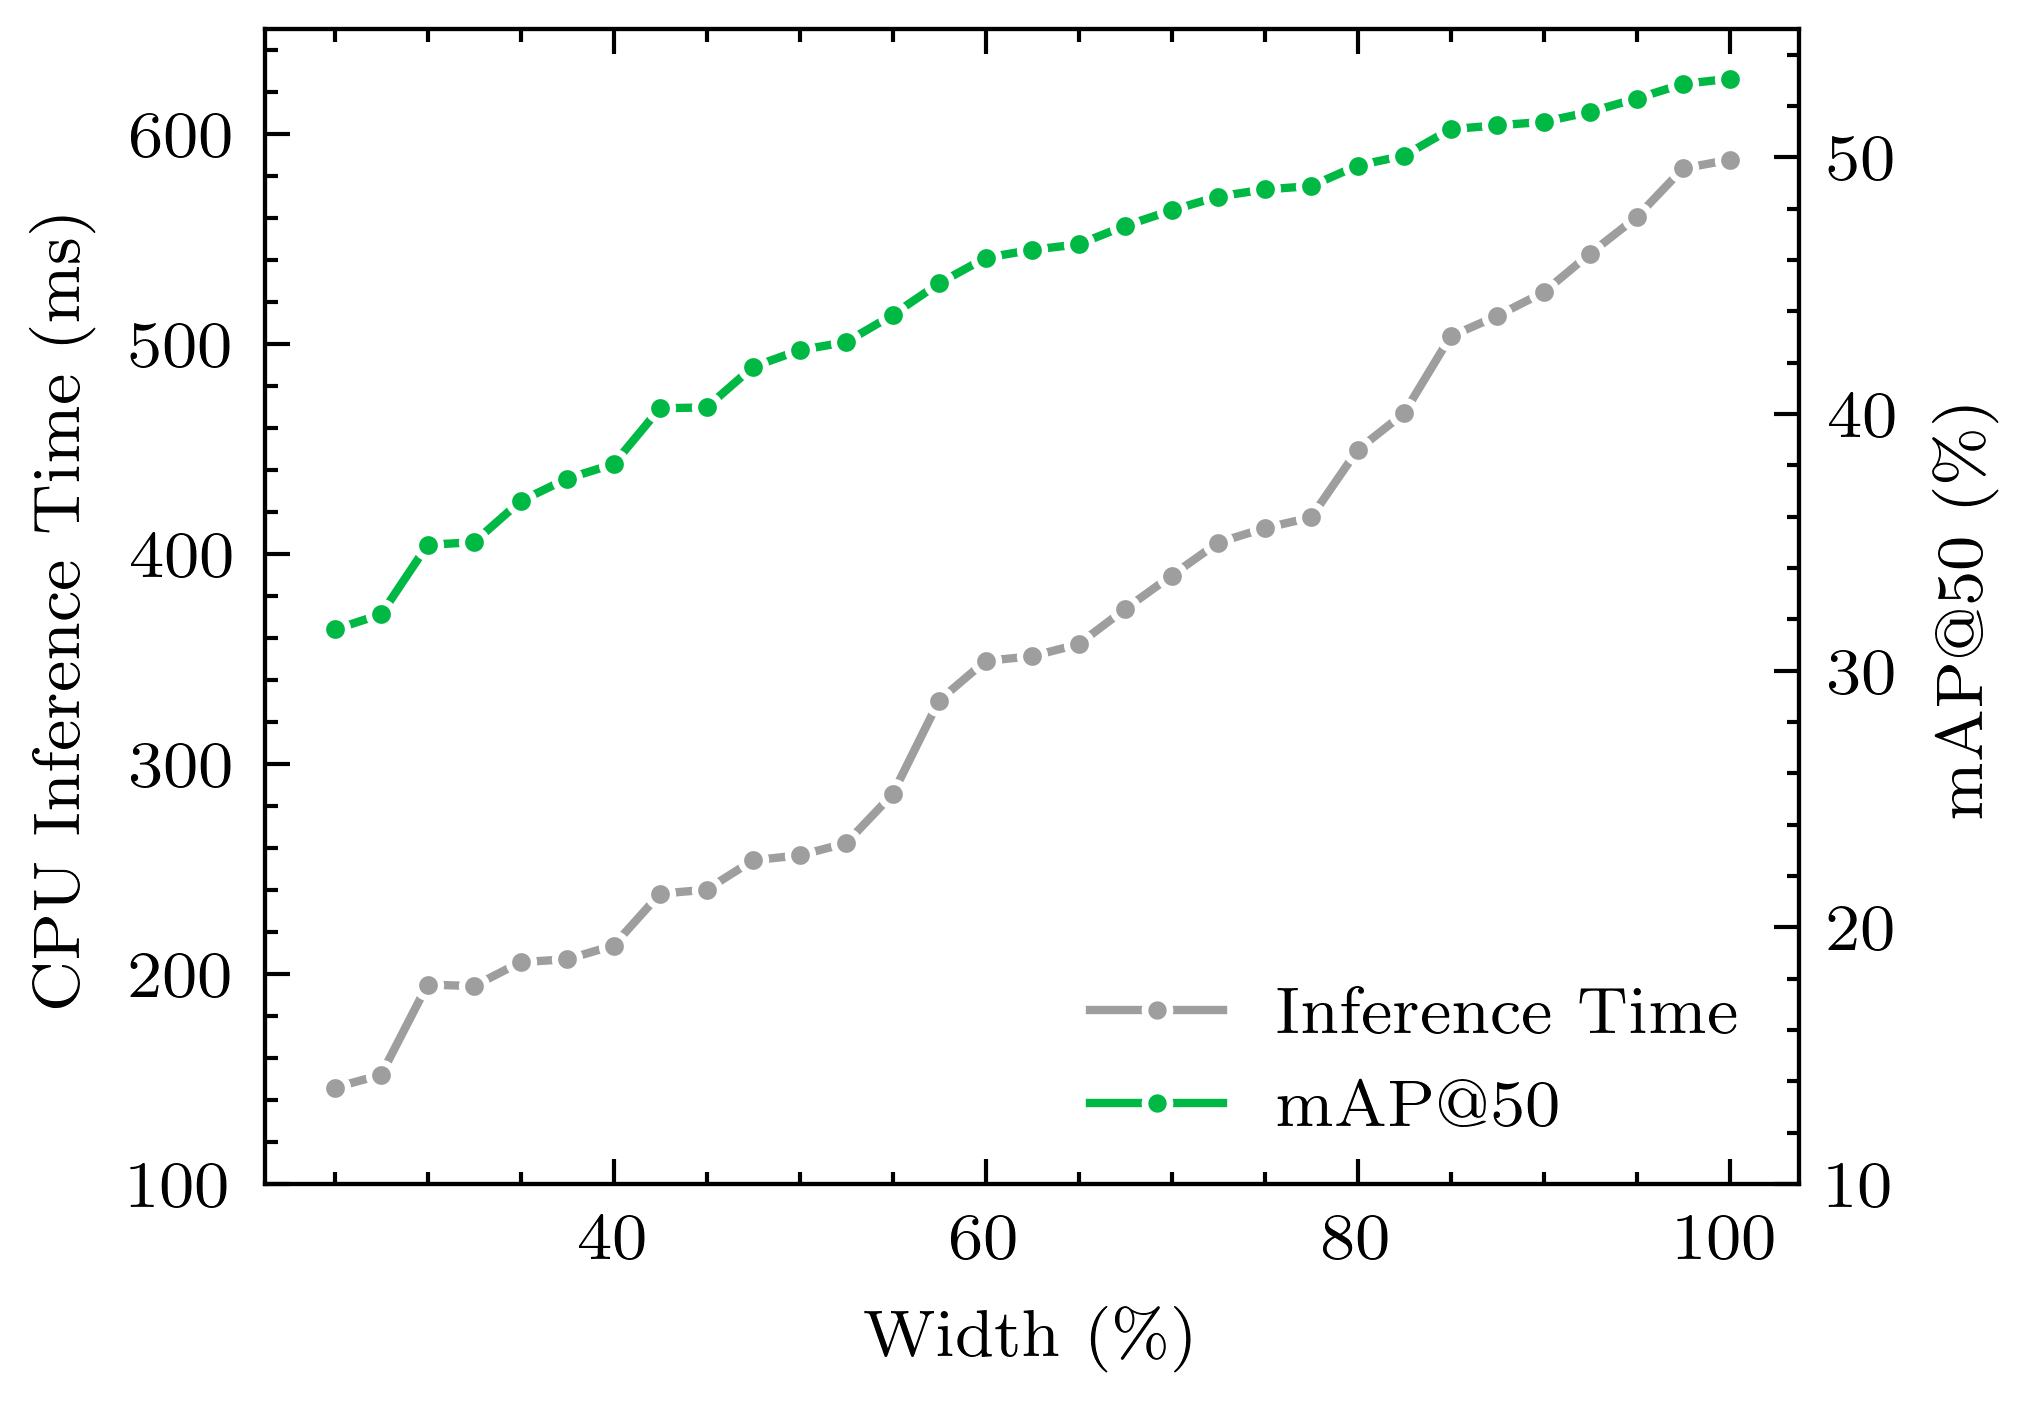

In [35]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

with plt.style.context(['science', 'ieee']):
    plt.rcParams['axes.prop_cycle'] = sci_cycle
    plt.figure(figsize=(column_width, column_width/1.5))
    fig, ax = plt.subplots()
    
    inference_time_cpu = sns.lineplot(data=df_yolov5s, x='width', y='inference_time_cpu', marker='o', c=sci_cycle.by_key()['color'][6], ax=ax, linewidth=1, markersize=3)
    ax.set_ylim(100, 650)
    
    ax.set_ylabel('CPU Inference Time (ms)')
    ax.set_xlabel('Width (\%)')
    
    ax_flip = ax.twinx()
    
    map50 = sns.lineplot(data=df_yolov5s, x='width', y='mAP@.5', marker='o', c=sci_cycle.by_key()['color'][1], ax=ax_flip, linewidth=1, markersize=3)
    ax_flip.set_ylim(10, 55)
    
    ax_flip.set_ylabel('mAP@50 (\%)')
    
    legend_handles = [Line2D([0], [0], color=sci_cycle.by_key()['color'][6], marker='o', markersize=3, mec='#ffffff', mew=0.8, label='Inference Time'),
                      Line2D([0], [0], color=sci_cycle.by_key()['color'][1], marker='o', markersize=3, mec='#ffffff', mew=0.8, label='mAP@50'),
    ]
    
    fig.legend(handles=legend_handles, loc='lower right', bbox_to_anchor=(0.9, 0.1))
    
    if SHOW:
        plt.show()
    else:
        plt.savefig('./results/plots/usyolov5s_cpu.pgf', bbox_inches='tight')
        plt.close()

<Figure size 2100x1400 with 0 Axes>

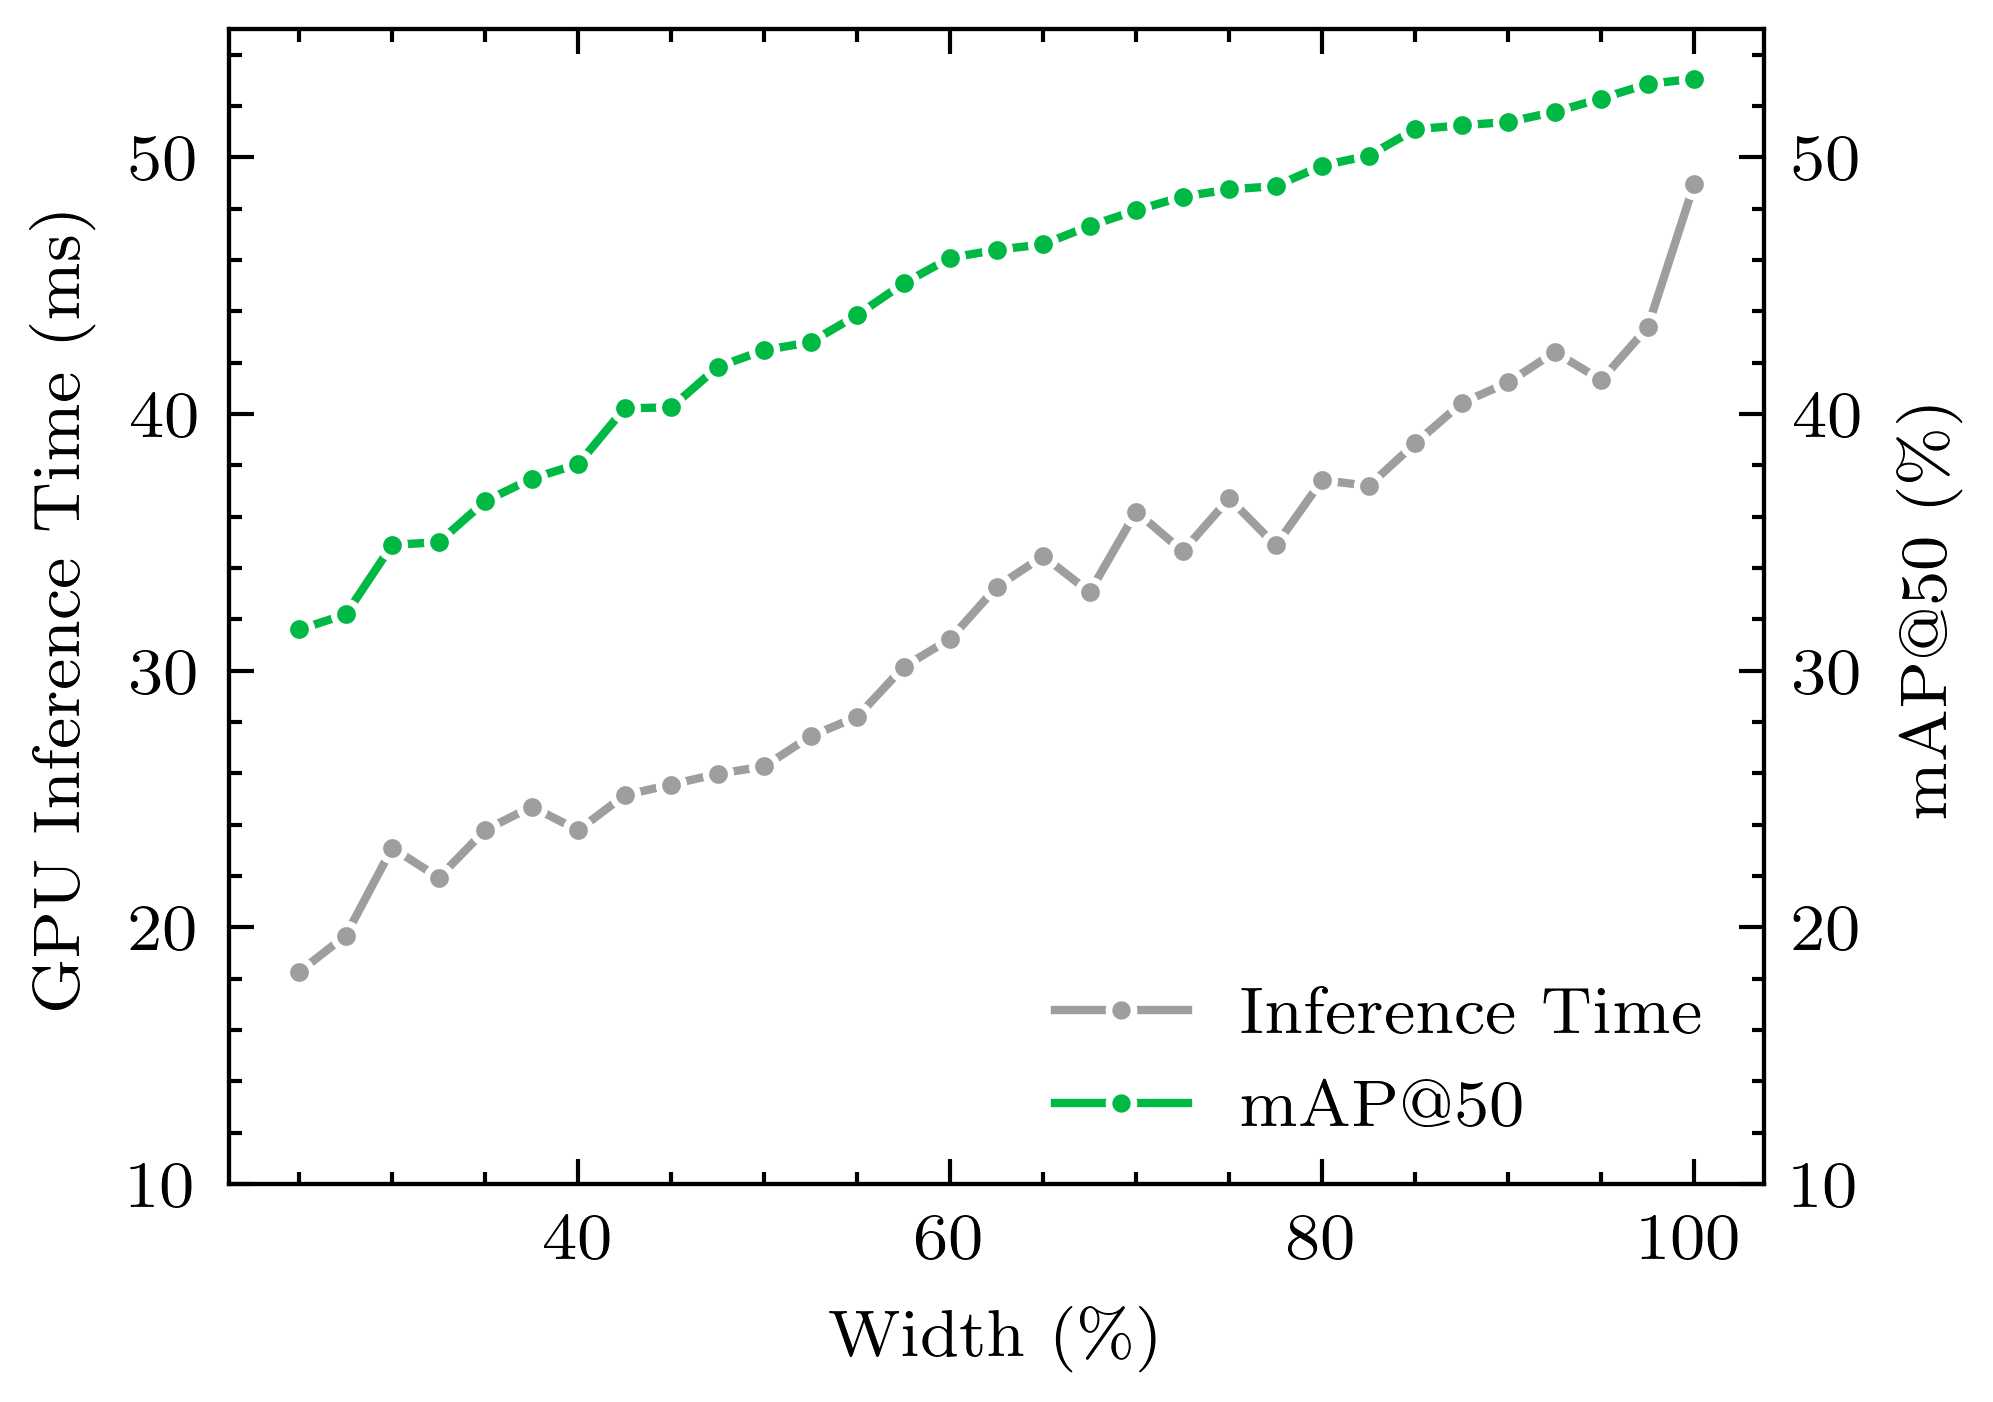

In [36]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

with plt.style.context(['science', 'ieee']):
    plt.rcParams['axes.prop_cycle'] = sci_cycle
    plt.figure(figsize=(column_width, column_width/1.5))
    fig, ax = plt.subplots()
    
    inference_time_cuda = sns.lineplot(data=df_yolov5s, x='width', y='inference_time', marker='o', c=sci_cycle.by_key()['color'][6], ax=ax, linewidth=1, markersize=3)
    ax.set_ylim(10, 55)
    
    ax.set_ylabel('GPU Inference Time (ms)')
    ax.set_xlabel('Width (\%)')
    
    ax_flip = ax.twinx()
    
    map50 = sns.lineplot(data=df_yolov5s, x='width', y='mAP@.5', marker='o', c=sci_cycle.by_key()['color'][1], ax=ax_flip, linewidth=1, markersize=3)
    ax_flip.set_ylim(10, 55)
    
    ax_flip.set_ylabel('mAP@50 (\%)')
    
    legend_handles = [Line2D([0], [0], color=sci_cycle.by_key()['color'][6], marker='o', markersize=3, mec='#ffffff', mew=0.8, label='Inference Time'),
                      Line2D([0], [0], color=sci_cycle.by_key()['color'][1], marker='o', markersize=3, mec='#ffffff', mew=0.8, label='mAP@50'),
    ]
    
    fig.legend(handles=legend_handles, loc='lower right', bbox_to_anchor=(0.9, 0.1))
    
    if SHOW:
        plt.show()
    else:
        plt.savefig('./results/plots/usyolov5s_cuda.pgf', bbox_inches='tight')
        plt.close()

# Resize Time (YOLOv5s)

In [37]:
resize_times = torch.load('./results/yolos_resize_time_100000.pt')

In [ ]:
resize_times

{(0.25, 0.3): {'running_time': 3.6702446937561035, 'occurences': 385},
 (0.3, 0.25): {'running_time': 3.7436861991882324, 'occurences': 407},
 (0.25, 0.35): {'running_time': 3.6345317363739014, 'occurences': 380},
 (0.35, 0.25): {'running_time': 3.7230279445648193, 'occurences': 404},
 (0.25, 0.4): {'running_time': 3.699629545211792, 'occurences': 385},
 (0.4, 0.25): {'running_time': 3.693563938140869, 'occurences': 401},
 (0.25, 0.45): {'running_time': 3.89324688911438, 'occurences': 399},
 (0.45, 0.25): {'running_time': 3.730968713760376, 'occurences': 405},
 (0.25, 0.5): {'running_time': 3.7597246170043945, 'occurences': 382},
 (0.5, 0.25): {'running_time': 3.493669033050537, 'occurences': 378},
 (0.25, 0.55): {'running_time': 3.9020562171936035, 'occurences': 393},
 (0.55, 0.25): {'running_time': 3.859926462173462, 'occurences': 418},
 (0.25, 0.6): {'running_time': 3.9925241470336914, 'occurences': 389},
 (0.6, 0.25): {'running_time': 3.6879119873046875, 'occurences': 399},
 (0.25,

In [39]:
differential_resize_times = {}

# First populate 
for key, val in resize_times.items():
    difference = int(round(key[1] - key[0], 2) * 100)
    differential_resize_times[difference] = {
        'running_time': 0.0,
        'occurences': 0, 
    }
    
# Fill
for key, val in resize_times.items():
    difference = int(round(key[1] - key[0], 2) * 100)
    if differential_resize_times[difference]['occurences']<301:
        differential_resize_times[difference]['running_time'] += val['running_time']
        differential_resize_times[difference]['occurences'] += val['occurences']

In [40]:
differential_resize_times

{5: {'running_time': 3.6702446937561035, 'occurences': 385},
 -5: {'running_time': 3.7436861991882324, 'occurences': 407},
 10: {'running_time': 3.6345317363739014, 'occurences': 380},
 -10: {'running_time': 3.7230279445648193, 'occurences': 404},
 15: {'running_time': 3.699629545211792, 'occurences': 385},
 -15: {'running_time': 3.693563938140869, 'occurences': 401},
 20: {'running_time': 3.89324688911438, 'occurences': 399},
 -20: {'running_time': 3.730968713760376, 'occurences': 405},
 25: {'running_time': 3.7597246170043945, 'occurences': 382},
 -25: {'running_time': 3.493669033050537, 'occurences': 378},
 30: {'running_time': 3.9020562171936035, 'occurences': 393},
 -30: {'running_time': 3.859926462173462, 'occurences': 418},
 35: {'running_time': 3.9925241470336914, 'occurences': 389},
 -35: {'running_time': 3.6879119873046875, 'occurences': 399},
 40: {'running_time': 4.279481410980225, 'occurences': 417},
 -40: {'running_time': 3.807605504989624, 'occurences': 413},
 45: {'runn

In [41]:
differential_mean = {}

for key, val in differential_resize_times.items():
    differential_mean[key] = val['running_time'] / val['occurences']

In [42]:
differential_mean[0] = 0.0

In [43]:
pairs = []

for key, val in differential_mean.items():
    pairs.append((key, val))
    
pairs = sorted(pairs, key=(lambda x: x[0]))

In [44]:
pairs[60], pairs[-60]

IndexError: list index out of range

In [45]:
pairs

[(-75, 0.009188358881035629),
 (-70, 0.009242163121121602),
 (-65, 0.00924592600627379),
 (-60, 0.009256458047575552),
 (-55, 0.009228773685316966),
 (-50, 0.009234431439076974),
 (-45, 0.00923772622140495),
 (-40, 0.009219383789321123),
 (-35, 0.009242887186227287),
 (-30, 0.009234273832950866),
 (-25, 0.009242510669445866),
 (-20, 0.009212268429037966),
 (-15, 0.009210882638755285),
 (-10, 0.009215415704368365),
 (-5, 0.009198246189651677),
 (0, 0.0),
 (5, 0.009533103100665205),
 (10, 0.009564557200983951),
 (15, 0.009609427390160498),
 (20, 0.009757511000286666),
 (25, 0.00984221103927852),
 (30, 0.009928896226955733),
 (35, 0.010263558218595608),
 (40, 0.010262545350072481),
 (45, 0.01048350391205418),
 (50, 0.01060554334178822),
 (55, 0.010751203859233421),
 (60, 0.010942347465999543),
 (65, 0.010997817290956108),
 (70, 0.011087814563422034),
 (75, 0.01055326871573925)]

In [46]:
x = [x_ for x_, y_ in pairs]
y = [y_ * 1000 for x_, y_ in pairs]

In [51]:
torch.std(torch.tensor(y[:15]))

tensor(0.0192)

In [52]:
y[:15]

[9.18835888103563,
 9.242163121121601,
 9.245926006273791,
 9.256458047575551,
 9.228773685316966,
 9.234431439076975,
 9.23772622140495,
 9.219383789321123,
 9.242887186227287,
 9.234273832950866,
 9.242510669445865,
 9.212268429037966,
 9.210882638755285,
 9.215415704368365,
 9.198246189651677]

In [48]:
len(x)

31

In [49]:
max(y), min(y), sum(y)/len(y)

(11.087814563422034, 0.0, 9.438484339282429)

In [50]:
y

[9.18835888103563,
 9.242163121121601,
 9.245926006273791,
 9.256458047575551,
 9.228773685316966,
 9.234431439076975,
 9.23772622140495,
 9.219383789321123,
 9.242887186227287,
 9.234273832950866,
 9.242510669445865,
 9.212268429037966,
 9.210882638755285,
 9.215415704368365,
 9.198246189651677,
 0.0,
 9.533103100665205,
 9.564557200983952,
 9.609427390160498,
 9.757511000286666,
 9.842211039278519,
 9.928896226955734,
 10.263558218595607,
 10.26254535007248,
 10.48350391205418,
 10.60554334178822,
 10.75120385923342,
 10.942347465999543,
 10.997817290956108,
 11.087814563422034,
 10.55326871573925]

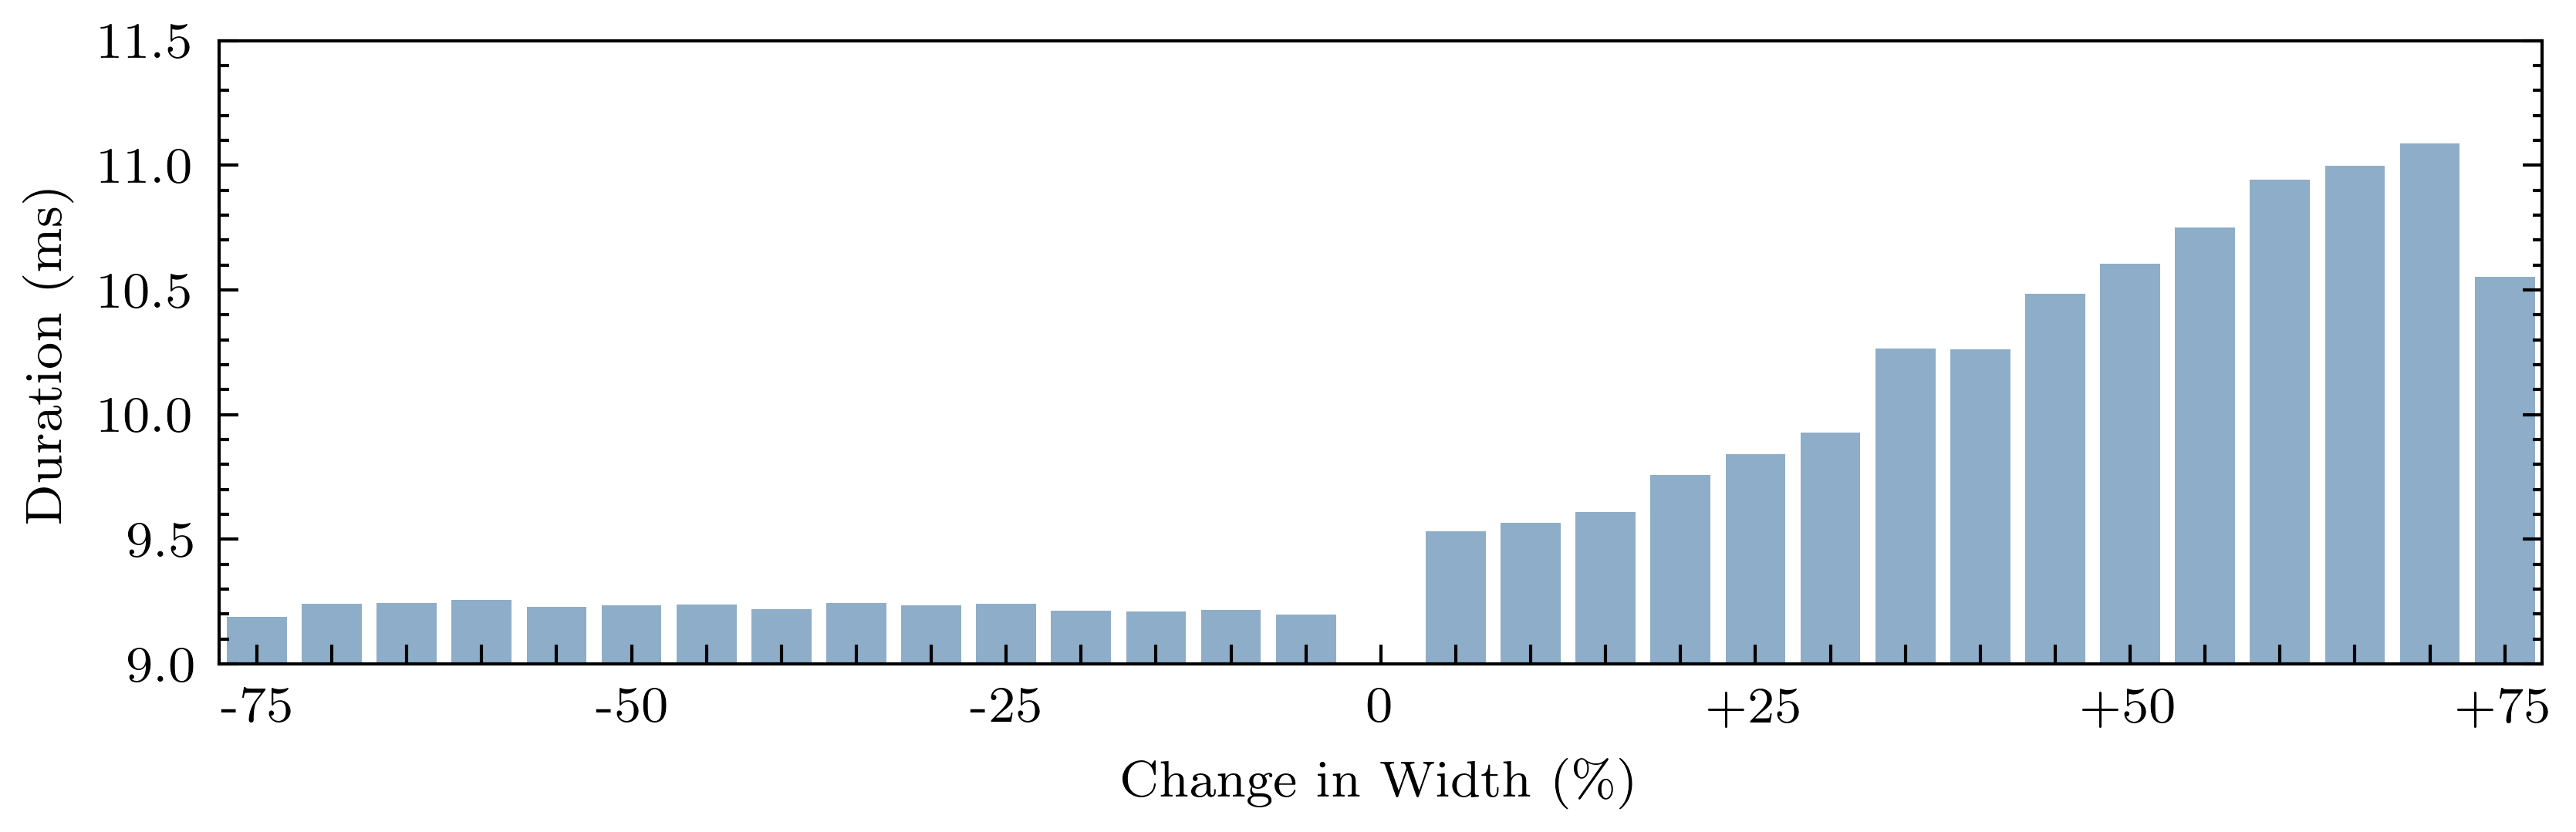

In [47]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

with plt.style.context(['science', 'ieee']):
    plt.rcParams['axes.prop_cycle'] = sci_cycle
    plt.figure(figsize=(column_width * 1.85, column_width/2))
    
    ax = sns.barplot(x=x, y=y, color=sci_cycle.by_key()['color'][0], alpha=0.5)
    # sns.despine()
    
    plt.ylim(9, 11.5)
    
    ax.tick_params(axis='x', which='minor', bottom=False, top=False)
    ax.tick_params(axis='x', which='major', bottom=True, top=False)
    custom_ticks = [-75, -50, -25, 0, 25, 50, 75]
    
    # Iterate over all x-tick labels and selectively hide them
    for label in ax.get_xticklabels():
        tick_value = float(label.get_text())  # Get the tick value as a number
        if tick_value not in [-75, -50, -25, 0, 25, 50, 75]:  # Keep only these
            label.set_visible(False)
        if tick_value in [25, 50, 75]:
            label.set_text(f'{int(tick_value):+d}')
            
    ax.set_xticklabels([f"{tick:+d}" if tick > 0 else f"{tick}" for tick in x])
    
    ax.set_xlabel('Change in Width (\%)')
    ax.set_ylabel('Duration (ms)')
    
    if SHOW:
        plt.show()
    else:
        plt.savefig('./results/plots/usyolov5s_resize_time.pgf', bbox_inches='tight')
        plt.close()